 A1: Python Analysis
**********************************************************************************************************************
                                                    March 2023
    Fernanda Cortes, Jeronimo de la Ossa, Priscilla Chacur, Clarisse Andrea, Luis Arellano & Catarina Jesus
                                                 Business Challenge #2
                                         Hult International Business School
**********************************************************************************************************************

# Background Information


_Context:_


The Spaceship Titanic interstellar passenger liner launched a month ago transporting 13,000 passagers to a trip to three newly habitable exoplanets. During the trip, the spaceship collided with a spacial anomaly resulting in half of the passagenders being transported to an alternate dimension. 

The given database contains infomraiton about the passengers in the spaceship, such as age, gender, amentites and cabin information and more. With that, the goal is to predict whether or not a passenger has been transported to the new dimention with the recovered information features of the damaged computer system. The models used will be evaluated using accuracy and AUC score.


__Goal: Create a model with a high classification accuracy where the percentage of predicted labels that are correct.__


# Introduction to the analysis

The SpaceShip Titanic Interstellar passenger liner has two sets of data, one where the data is complete and another where the data about the passengers transported is incomplete. The database contains information such as the age, gender, amenities and more. 

In order to create a high accuracy model where the predicted labels are correct, the team started by merging the databases together, complete and incomplete and then did a basic data cleaning and filling of the empty values in a passenger’s database depending on the type of data that was missing which could be categorical or numerical. 

This was done in order to prepare the data for machine learning modeling. The database was then split to a training and testing set so that the machine learning models could be used. This includes models such as Decision Tree, Random Forest, Gradient Boosting and the like. The models are then evaluated based on the accuracy for making predictions of whether a passenger was transported in the anomaly or not.

# Top three actionable insights 

The model built to determine which characteristics of travelers provided certain insights as well as the ability to rely on them. By looking at the weight certain features have when explaining the model, we can then analyze the correlation to interpret whether who is more likely to be missing. Some of the **main features** in our model include:
- Luxury expenses
- Total expenditure
- Essentials expenditure
- Home Planet Earth
- Age
- Family Size
For the rescue team to put in action what the model explains, we need to understand the characteristics used in the model.

Because how our model is constructed, the variables shown help us predict which characteristics the missing travellers do **not** have.
By analyzing the results, we can direct the rescue crew in a specific direction through the following insights

##  Different Type of Expenses
The results showed us that the less the travellers spent on different type of ammenities, the more likely they were to be transported. This insight can be translated in different ways. There are five different consumables, which can be narrowed into two categories, Luxury and Essential. We should guide the rescue Crew mainly towards the people who spent the less. We can assume that these are the group of people wether in cryosleep or absteining from spending money in the spaceship.


## People not spending money, Who are they?
Expanding further on the previous point, the less a traveler spends, the more likely they are to be transported. Focusing on the demographic that would fit the description besides the ones in cryosleeps, when we look into how the age variable affects the model, we can conclude that the posibility of being transported was also higher for the younger traveller. While the Family Size of the travellers did affect the model, it had a smaller impact than the ones mentioned before, That is why we recommend the rescue crews to look into small groups of travellers with at least one younger passenger. In some cases these would travel while in cryosleep.

## Not from Earth
Lastly, directing the search groups towards the travellers who were not residents of Planet Earth. While we have limited information on whether the missing travellers were from Europa or Mars, the predictions provide certain confidence that the likelihood of the missing passengers being from Earth is lower. 

By putting together certain puzzle pieces, we can rule out to certain extent passengers from Mars.
This is because the predictions tell us that passengers in decks E and F were also less likely to be transported. These two decks were mainly populated by Martians, which leave us to Europa Citizens.

#  Conclusion

Finalizing with a brief specific path to follow, we should direct the rescue crews towards the passengers residents of Europa, travelling in small groups, whether in cryosleep or restraining themselves from spending much, who fall within the younger side of the whole tripulation. The recommendations provided are not polarizing the possibility of other type of travelers, but with the use of a ruling out method, combine with statistical techniques, this specific demographic seems to be the one affected the most. The additional information deduced from the model with most accuracy is that the missing people will most likely not be Spending much on luxury, or spending much for any case, except for shopping mall consumables. 

# Data Introduction

Below is a starter code that comes with Jupyter Notebook.

In [658]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Libraries

In [659]:
# modeling library
import sklearn.linear_model                          # linear modeling in scikit-learn

# other model building tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import roc_auc_score            # auc score

In [660]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [661]:
# Core

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time
import squarify    


# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, make_scorer
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn import metrics

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier




## Variables

*Feature descriptions:*
> * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
> * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
> * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
> * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
> * **Destination** - The planet the passenger will be debarking to.
> * **Age** - The age of the passenger.
> * **VIP** - Whether the passenger has paid for special VIP service during the voyage.
> * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
> * **Name** - The first and last names of the passenger.
> * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

*Retrived from Spaceship Titanic Kaggle Dataset Description*

## Data

In [662]:
# importing the training dataset
path             = "./"
training_dataset = "train.csv"


# reading in the .csv file with pandas
titanic_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)


# checking basic info about the dataset
titanic_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [663]:
# importing the training dataset
path             = "./"
testing_dataset  = 'test.csv'

# importing the testing dataset
titanic_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)

# checking basic info about the dataset
titanic_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Joining the datasets together before feature engineering. This will help make things more efficient.<br>

In [664]:
titanic_train['set'] = 'Training'
titanic_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
titanic_df = titanic_train.append(other = titanic_test)

# resetting index to avoid problems later in the code
titanic_df.reset_index(drop = False,
                       inplace = True)

In [665]:
# Shape and preview
print('Full set shape:', titanic_df.shape)

titanic_df.head()

Full set shape: (12970, 16)


,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Let's look at correlations to find an x-variable to model with.<br>

In [666]:
# instantiating a correlation matrix
titanic_corr = titanic_train.corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
titanic_corr.loc[ : , 'Transported' ].apply(func = abs).sort_values(ascending = False)

Transported     1.00
RoomService     0.24
Spa             0.22
VRDeck          0.21
Age             0.08
FoodCourt       0.05
ShoppingMall    0.01
Name: Transported, dtype: float64

**Missing values**

In [667]:
print('Missing Values:')
print(titanic_df.isna().sum())

Missing Values:
index              0
PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
set                0
dtype: int64


# Data exploration (EDA) 

**General Descriptive Statistics**

In [668]:
titanic_df.describe().round(2)

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.00,12700.00,12707.0,12681.00,12664.00,12686.00,12702.00
mean,3617.89,28.77,222.9,451.96,174.91,308.48,306.79
std,2408.61,14.39,647.6,1584.37,590.56,1130.28,1180.10
min,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,1621.00,19.00,0.0,0.00,0.00,0.00,0.00
50%,3242.00,27.00,0.0,0.00,0.00,0.00,0.00
75%,5449.75,38.00,49.0,77.00,29.00,57.00,42.00
max,8692.00,79.00,14327.0,29813.00,23492.00,22408.00,24133.00


**Correlation Matrix before any data cleaning**

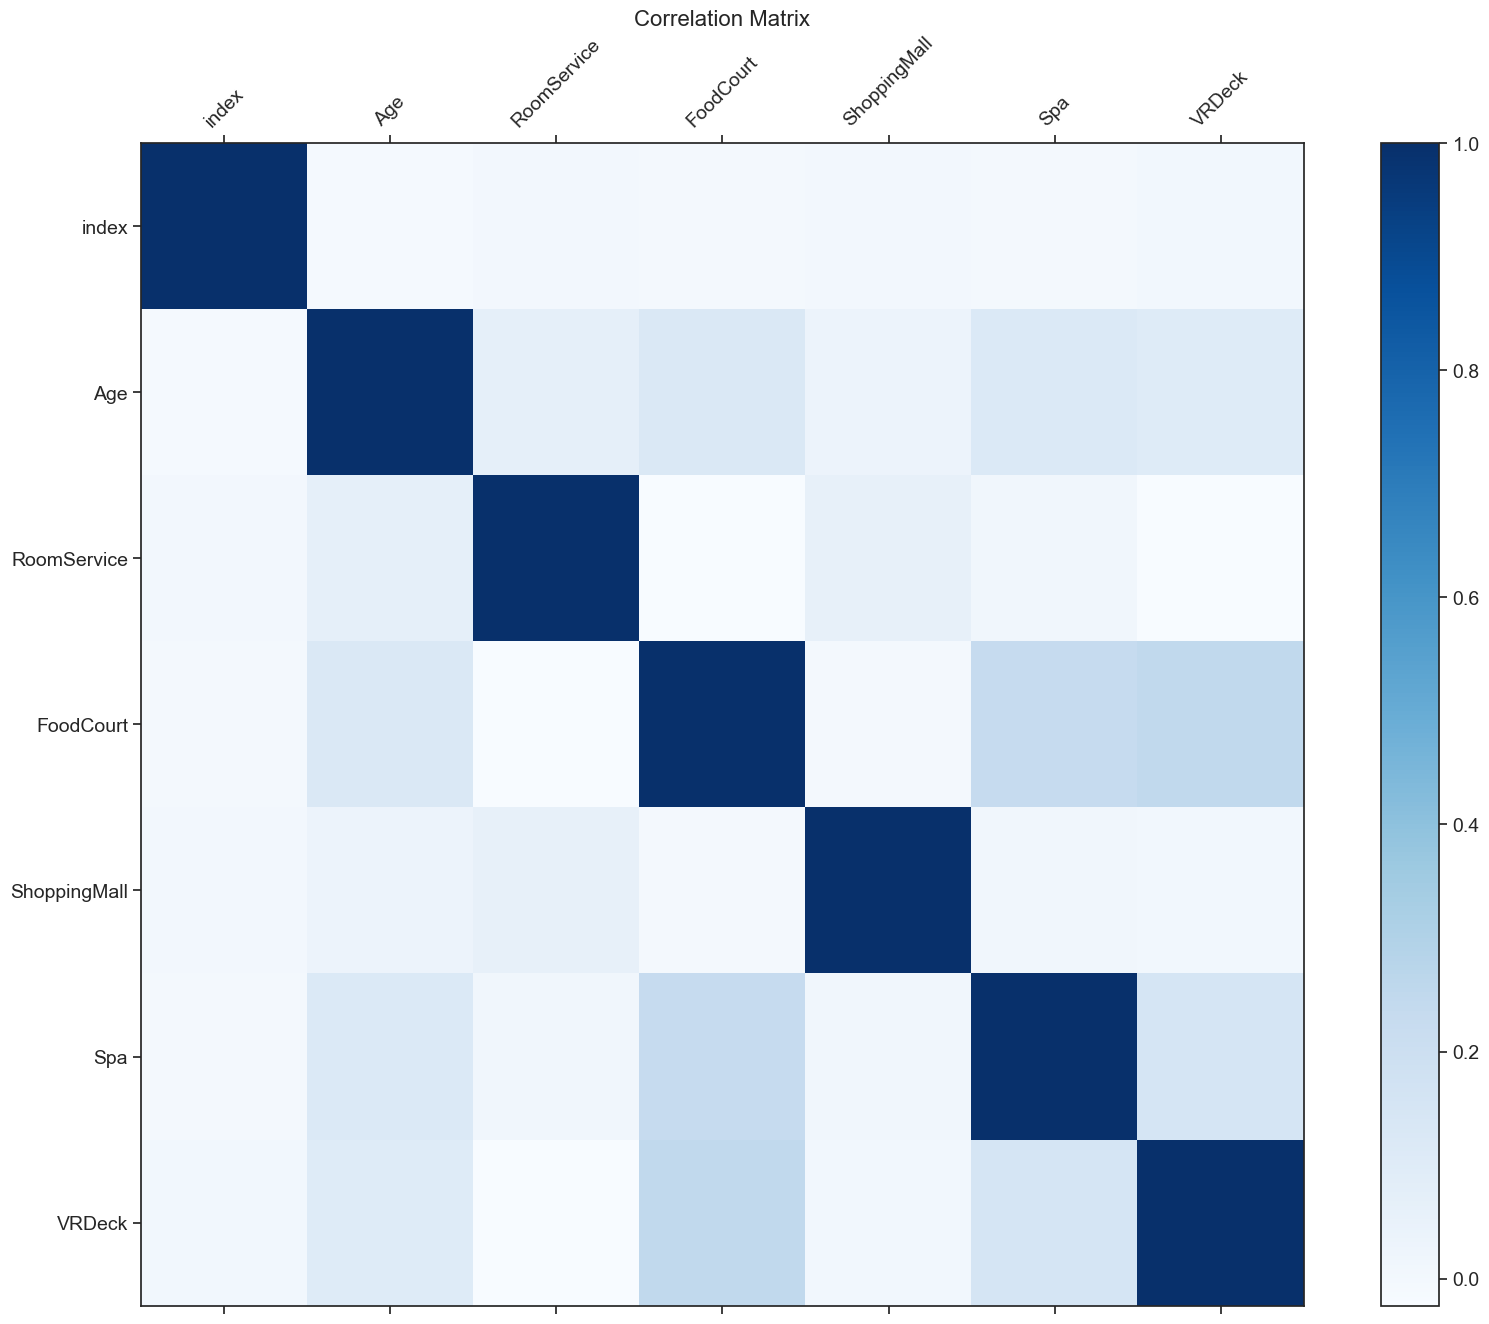

In [669]:
#Understanding the correlation between the variables (creating matrix)

#setting correlation variable
data_corr = titanic_df.corr()

#creating the matrix
corr_matrix = plt.figure(figsize=(20, 15))
plt.matshow(data_corr, fignum=corr_matrix.number, cmap = 'Blues')
plt.xticks(range(data_corr.shape[1]),
           data_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(data_corr.shape[1]), 
           data_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
#Understanding the correlation between the variables (creating matrix)

**Transported vs. Non Transported**

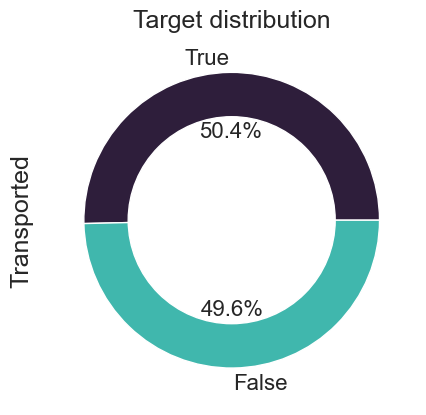

In [670]:
# Distribution of T/F on predicted column

#This visualization is used to understand the number of passengers that were transported vs the ones that has not been transported
titanic_df['Transported'].value_counts() \
                         .plot.pie(autopct='%1.1f%%',
                                         colors = ['#2e1e3b','#40b7ad'], 
                                         textprops={'fontsize':16}) \
                                         .set_title("Target distribution")

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In a way to understand the distribution of the target between the passengers that were transported and the passengers that were not transported it was built a pie chart with the distribution of the passengers. “True” represents the passengers that were transported and “False” represents the people that weren’t. 
After analyzing the graph is possible to conclude that 50.4% of the target population was transported by the anomaly and 49.6% of the passengers weren’t transported. 
The target is highly balanced, so in this case, we do not need to consider techniques like under/over-sampling.

**Numerical Features**

Text(0.5, 0, 'Age (years)')

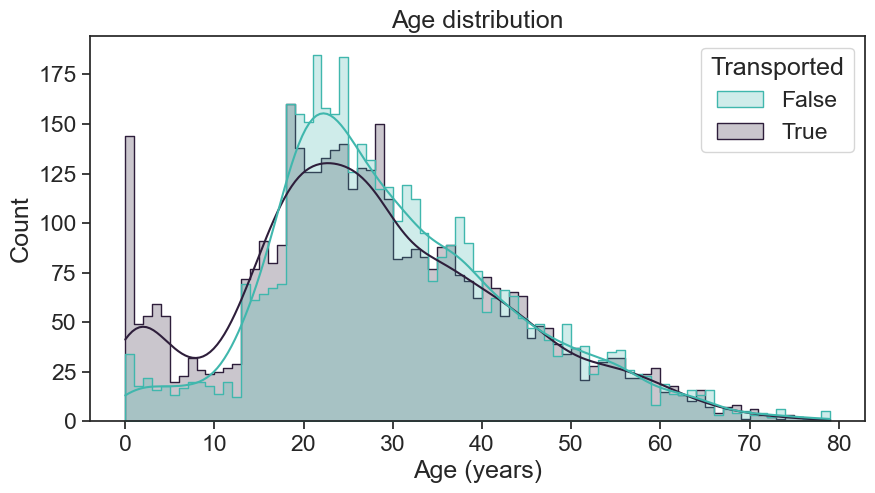

In [671]:
# Distribution of Age of Transported vs. non transported passangeders

#This visualization is used to understand the age distribution of number of passengers that were transported vs the ones that has not been transported

sns.set_theme(style="ticks", font_scale = 1.5)

# Figure size
plt.figure(figsize=(10,5))

# Histogram
sns.histplot(data = titanic_df, 
             palette = ['#40b7ad','#2e1e3b'],
             x = 'Age', 
             hue = 'Transported',
             element = 'step',
             binwidth = 1, 
             kde = True)

# Labeling the graph
plt.title('Age distribution')
plt.xlabel('Age (years)')

The previous graph represents the distribution of the population that was transported and not transported. 
It is possible to visualize that:

* Passengers between 0-18 years old: were more likely to be transported than not.
* Passengers between 18-25 years old: were less likely to be transported than not.
* Passengers over 25 years old: were equally likely to be transported or not.

With this distribution is possible to take a conclusion about the stage of life of the passengers, which can be classified as a child, teenager, or adult.

**Numerical Log Features**

Text(0.5, 0, 'Log of Expenditures')

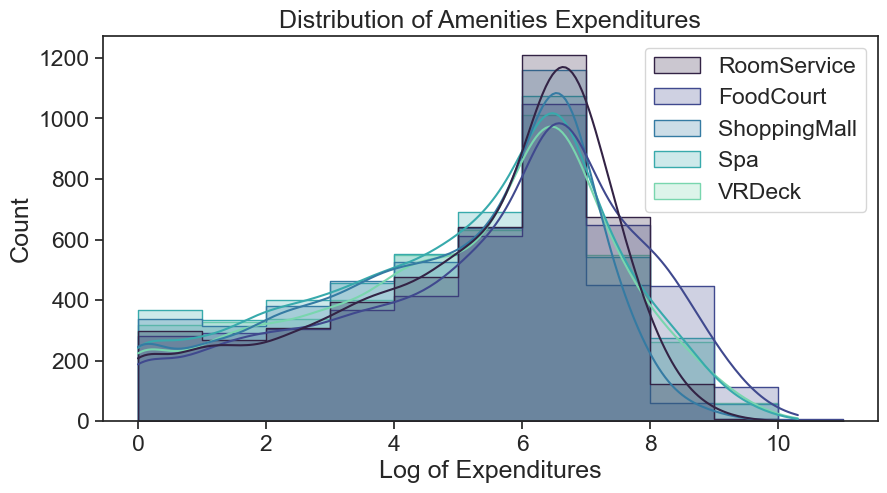

In [672]:
# Distribution of Log of total expenditures

#This visualization is used to understand the distribution of expenditures by each amentinites and the log of the total expenditure

# Figure size
plt.figure(figsize=(10,5))

# Kernel Density Estimate with logarithmic expenditures
expenditures = titanic_df.loc[:,['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
sns.histplot(data = np.log(expenditures),
            palette = 'mako',
            element = 'step',
            binwidth = 1, 
            kde = True)


# Labeling the graph
plt.title('Distribution of Amenities Expenditures')
plt.xlabel('Log of Expenditures')

The previous graph represents the distribution of the amenities expenditures. It used the log of expenditures to reduce the impact of extreme values or outliers in the data, by compressing the scale of the x-axis.
It is possible to conclude that:

* The distribution of spending increases exponentially until half of the max of expenses and then drops exponentially.
* The expenses that a person spends more money on are in Room Service.
* The distribution of the expenditures in RoomService, Spa, and VRDeck per number of passengers is higher which indicates luxury amenities, which might mean that most of the passengers are in the higher class.


In [673]:
#Descriptive Statistics for total expenditres

expenditures.describe().round(2)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12707.0,12681.00,12664.00,12686.00,12702.00
mean,222.9,451.96,174.91,308.48,306.79
std,647.6,1584.37,590.56,1130.28,1180.10
min,0.0,0.00,0.00,0.00,0.00
25%,0.0,0.00,0.00,0.00,0.00
50%,0.0,0.00,0.00,0.00,0.00
75%,49.0,77.00,29.00,57.00,42.00
max,14327.0,29813.00,23492.00,22408.00,24133.00


**Separating PassengergroupsID for members and groups**


In [674]:
titanic_df[['PassengerID_Group', 'PassengerID_member']] =titanic_df['PassengerId'].str.split('_', 1, expand=True)

titanic_df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID_Group,PassengerID_member
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,0001,01
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,0002,01
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,0003,01
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,0003,02
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,0004,01


In [675]:
#separating cabins and deck

titanic_df[['Deck', 'Number_Port_Starboard']] =titanic_df['Cabin'].str.split('/', 1, expand=True)

titanic_df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,set,PassengerID_Group,PassengerID_member,Deck,Number_Port_Starboard
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Training,0001,01,B,0/P
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Training,0002,01,F,0/S
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Training,0003,01,A,0/S
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Training,0003,02,A,0/S
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Training,0004,01,F,1/S


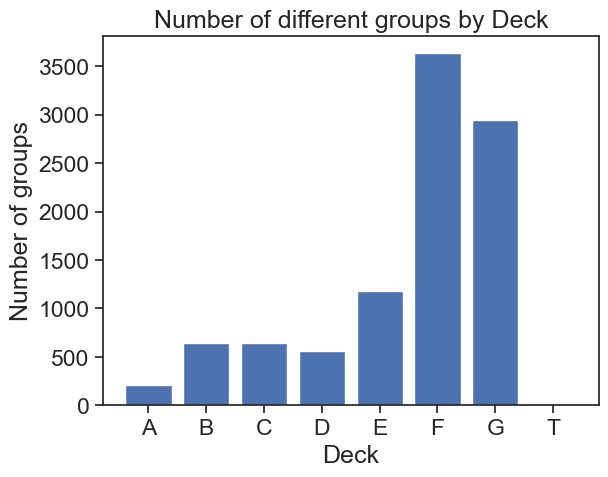

In [676]:
# Distribution of PassengerID_Group and Deck

# Count the number of groups for each Deck
groups_by_deck = titanic_df.groupby('Deck')['PassengerID_Group'].nunique()

# Create a bar plot of the results
plt.bar(groups_by_deck.index, groups_by_deck.values)
plt.xlabel('Deck')
plt.ylabel('Number of groups')
plt.title('Number of different groups by Deck')
plt.show()

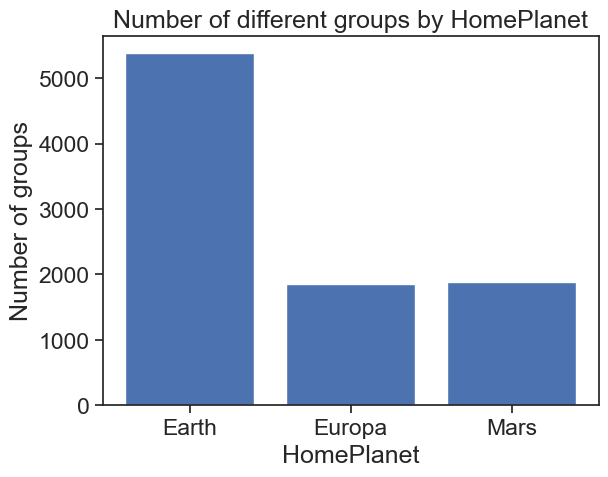

In [677]:
# Count the number of groups for each HomePlanet
groups_by_homeplanet = titanic_df.groupby('HomePlanet')['PassengerID_Group'].nunique()

# Create a bar plot of the results
plt.bar(groups_by_homeplanet.index, groups_by_homeplanet.values)
plt.xlabel('HomePlanet')
plt.ylabel('Number of groups')
plt.title('Number of different groups by HomePlanet')
plt.show()

**Categorical Features**

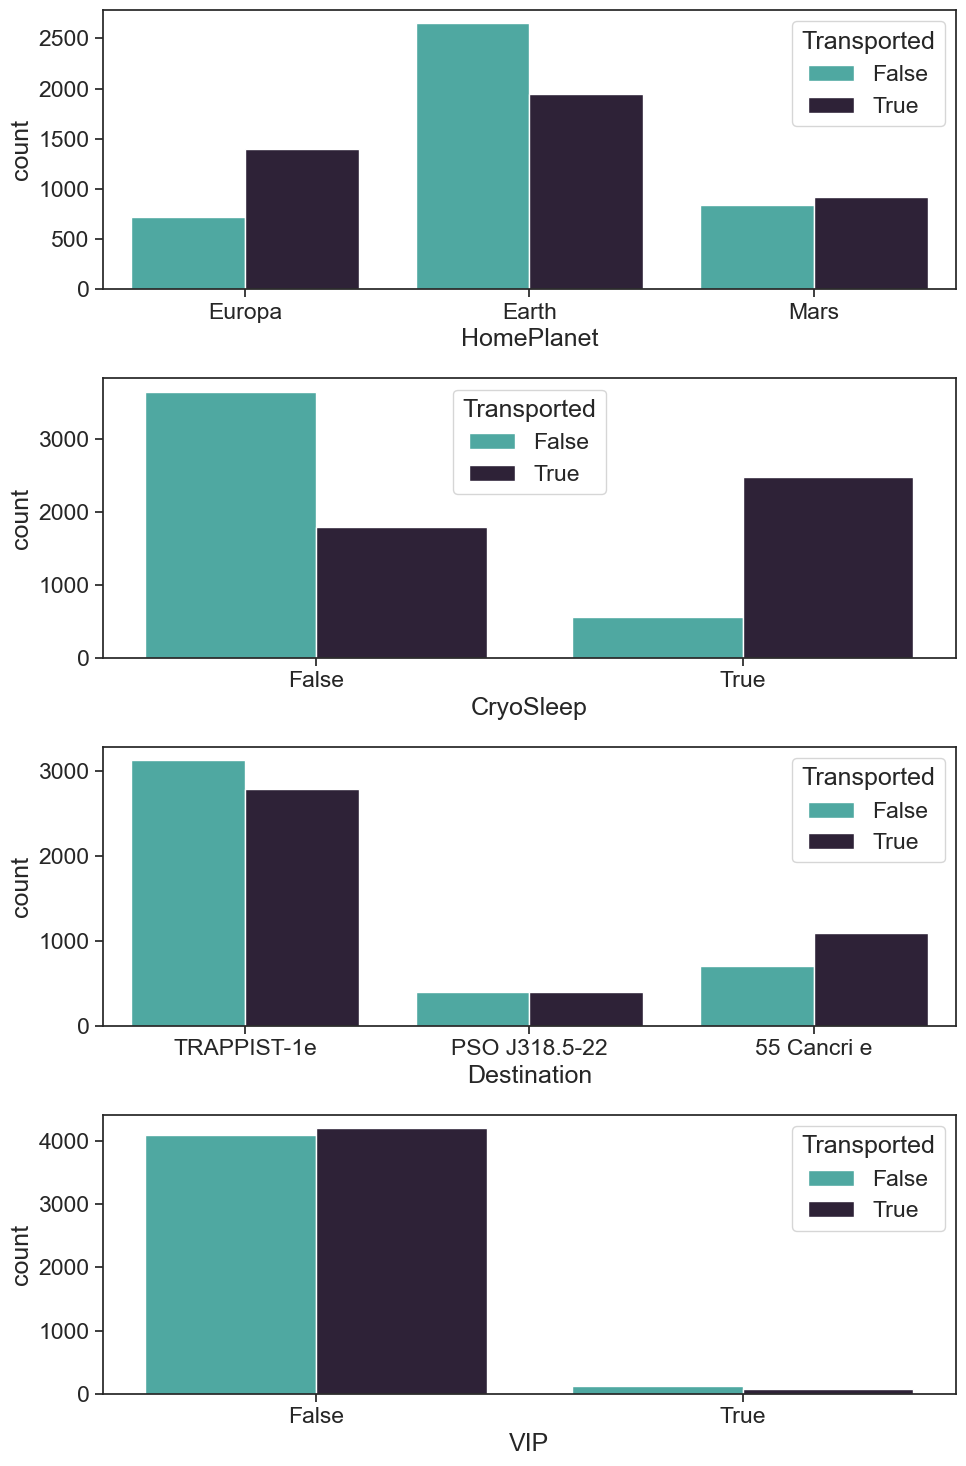

In [678]:
# Understanding the passengers of who have and have not been transported based on 4 categorical variables: HomePlanet, CryoSleep, Destination, VIP

fig, ax = plt.subplots(4, 1, figsize=(10, 15))

sns.countplot(data = titanic_df,
                  x = 'HomePlanet',
                  hue='Transported',
                  palette = ['#40b7ad','#2e1e3b'],
                  ax=ax[0])

categorical = ['CryoSleep', 'Destination', 'VIP'] #HomePlanet


for i, variable in enumerate(categorical):
    sns.countplot(data = titanic_df,
                  x = variable,
                  hue='Transported',
                  palette = ['#40b7ad','#2e1e3b'],
                  ax=ax[i+1])
    
plt.tight_layout()

These 4 visualizations show the difference between the passages that have been transported and the ones that have not by the categorical variables. These graphs are specifically important as its still part of the exploratory data and included the variables: HomePlanet, CryoSleep, Destination and VIP. It already provides an overview of how variable changes compares to weather the passenger has been transported or not. For instance, the difference between the transported or not transported for those that are VIP or not is almost insignificant, which can be an indicator that VIP status alone might not be a strong factor to predict the transport outcome, similarly to destination. While on the other hand, it’s possible to notice that the most common home planet is Earth and that most people from there does not get transported but the difference it’s not clear yet on how it impacts transport. However, for the CryoSleep categorical variable, the difference between the transported and not it shown to be large enough to have an impact, which is an indicator that doing feature engineering with it might contribute to the accuracy of the model.

**Qualitative Features**

In [679]:
# Qualitative features of cabin and passengerID to understand the connection

qualitative = ['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
titanic_df[qualitative].head(10)


,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines
5,0005_01,F/0/P,Sandie Hinetthews
6,0006_01,F/2/S,Billex Jacostaffey
7,0006_02,G/0/S,Candra Jacostaffey
8,0007_01,F/3/S,Andona Beston
9,0008_01,B/1/P,Erraiam Flatic


_Based on the results, the first 4 digits of the passengerID relates to the group that tends to have the same last name._

# Feature Engineering with New Features

**New Feature: Group and Group Size**

Text(0.5, 1.0, 'Group size')

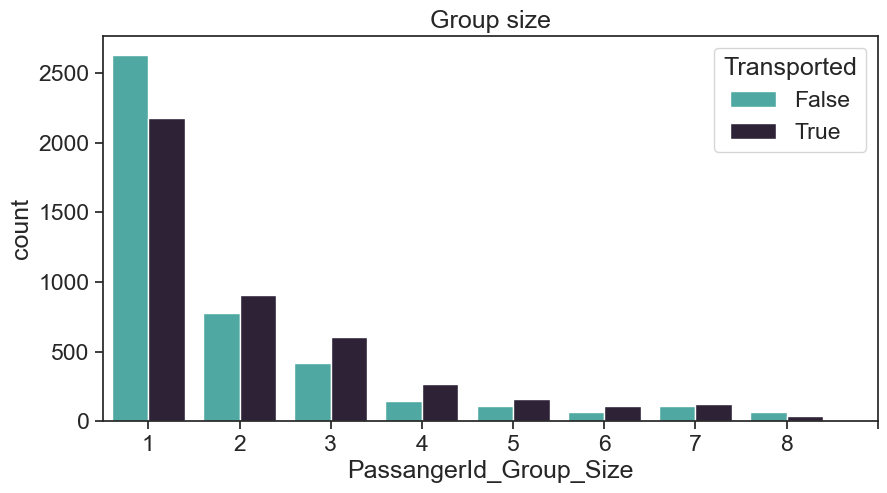

In [680]:
# Add group feature from PassangerId
titanic_df['PassangerId_Group'] = titanic_df['PassengerId'] \
                                  .apply(lambda x: x.split('_')[0]) \
                                  .astype(int)

# Add group size feature from PassangerId
titanic_df['PassangerId_Group_Size'] = titanic_df['PassangerId_Group'] \
                                       .map(titanic_df['PassangerId_Group'] \
                                       .value_counts())
 
# Plot distribution of group size
plt.figure(figsize=(10,5))

sns.countplot(data = titanic_df, 
              x = 'PassangerId_Group_Size',
              palette = ['#40b7ad','#2e1e3b'],
              hue = 'Transported')

plt.xticks(range(0, 9))
plt.title('Group size')

**Age with Transported and Non- Transported**

In [681]:
titanic_df.groupby('Transported')['Age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
False,4226.0,29.92,13.70,0.0,21.0,27.0,38.0,79.0
True,4288.0,27.75,15.15,0.0,18.0,26.0,37.0,78.0


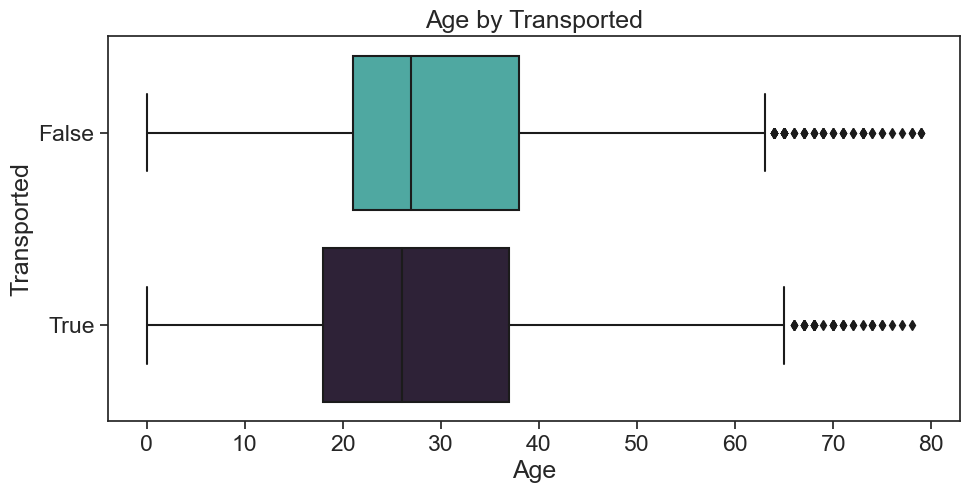

In [682]:
#Setting the box to plot the graph
fig, ax = plt.subplots(figsize=(11, 5))

#This helps understand and compare if the age matteres for rather the passenger has been transported or not
sns.boxplot(y='Transported', 
            x='Age', 
            palette = ['#40b7ad','#2e1e3b'],
            data=titanic_df, 
            orient='h')

#Labeling graphs
plt.title('Age by Transported')
plt.xlabel('Age')
plt.ylabel('Transported')
plt.show()

While exploring the data, one of the variables is age of the passengers, which would be important to determine if that would be a strong predictor or not. However, when running the descriptive statistics about on age for the transported outcome, the difference was almost insignificant. The average between the ones that were not transported and the ones that were was about 2 years only, while the quantile also followed a standard. While the describe function already provided insights, it was important to also visualize it to understand the distribution of age. With that, it was possible to see that all passengers above around 63 years old were considered outliers. While there was about 62 more people transported than the non-transported the distribution is relatively even out. This shows that age alone will not be a strong predictor, but perhaps could contribute on predicting transport if its manipulated or separated into bins.

**Solo Travelers**

Text(0.5, 1.0, 'Solo travelers')

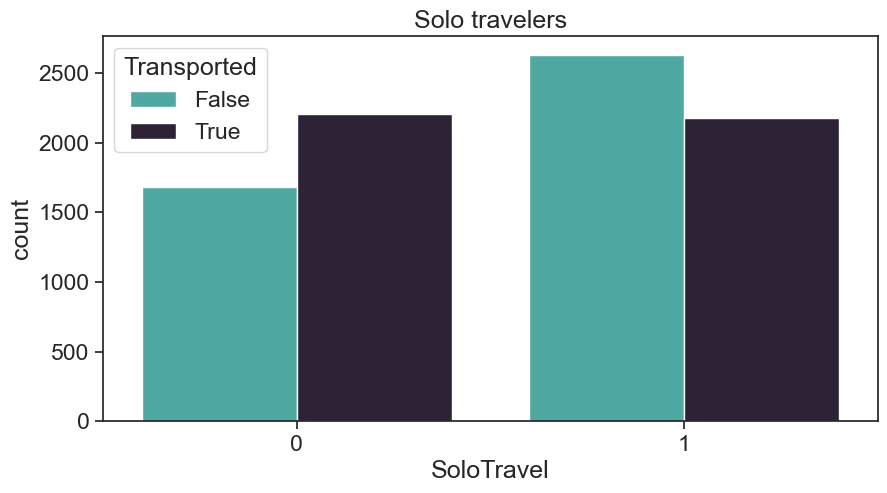

In [683]:
# Add feature to determine if someone was traveling solo, ie group size = 1

#Filtering the data and changing the datatype
titanic_df['SoloTravel'] = (titanic_df['PassangerId_Group_Size'] == 1).astype(int)

# Plot distribution of solo travelers
plt.figure(figsize=(10,5))

sns.countplot(data = titanic_df, 
              x = 'SoloTravel',
              palette = ['#40b7ad','#2e1e3b'],
              hue = 'Transported')

plt.title('Solo travelers')

A new feature was added to the titanic dataset and this indicates whether a passenger is a solo traveler. The code starts by filtering the data to check if a passenger is in a group of just one passenger. Adding this feature can improve the machine learning model and make more accurate predictions. It is important to check the percentage of the passengers who are traveling alone. This shows that the solo travel could contribute to the prediction of the transported passengers. 




**Cabin Information**

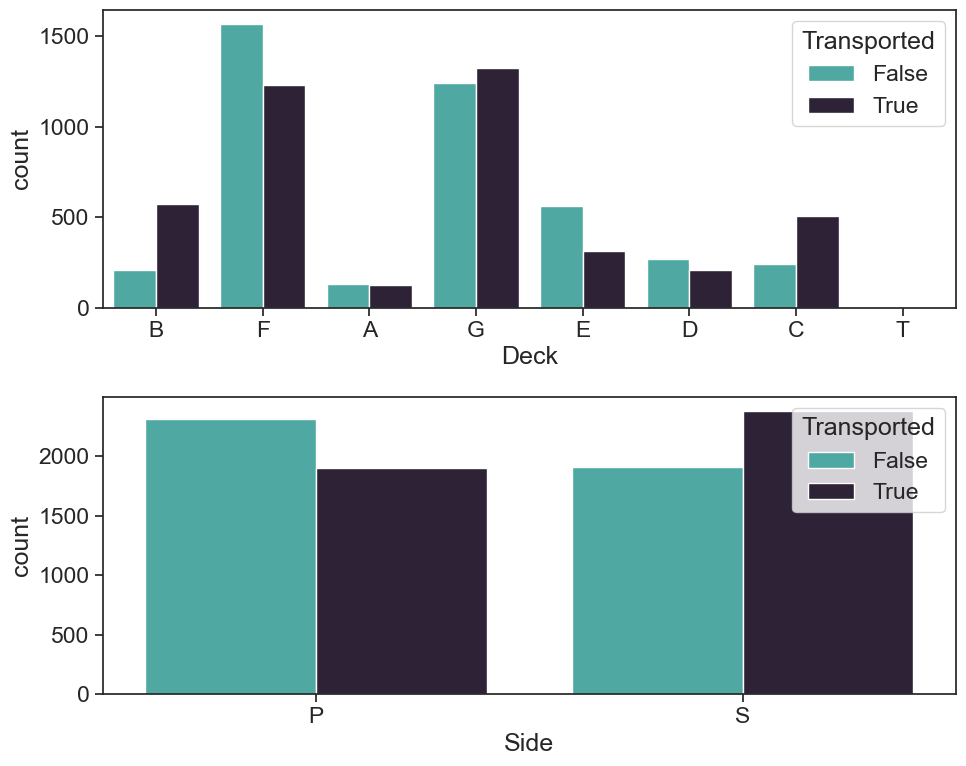

In [684]:
#Understanding the relationship between the transported passengers and cabins and side of the deck

#Add feature to separate cabin column into different columns for breakdown of information
titanic_df[['Deck', 'CabinNum', 'Side']] = titanic_df['Cabin'].str.split('/',expand=True)

# Plot distribution of cabin info

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sns.countplot(data = titanic_df,
             x = 'Deck',
             hue='Transported',
             palette = ['#40b7ad','#2e1e3b'],
             ax=ax[0])

sns.countplot(data = titanic_df,
             x = 'Side',
             hue='Transported',
             palette = ['#40b7ad','#2e1e3b'],
             ax=ax[1])

plt.tight_layout()

**Family Size**

Text(0.5, 1.0, 'Family size')

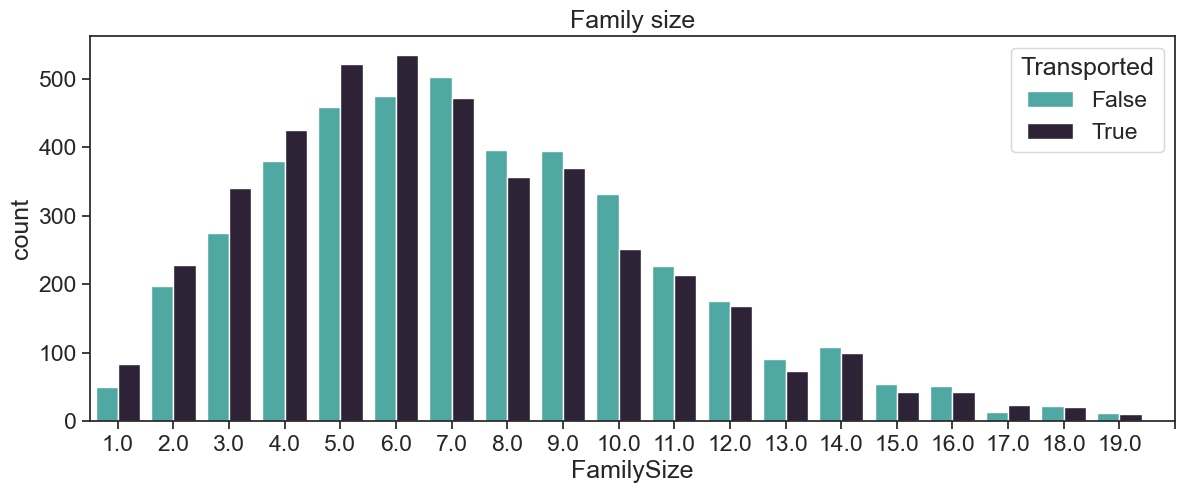

In [685]:
# Add feature to separate cabin information
titanic_df[['FirstName','FamilyName']] = titanic_df['Name'].str.split(expand=True)

# Add group size feature from PassangerId
titanic_df['FamilySize'] = titanic_df['FamilyName'] \
                                       .map(titanic_df['FamilyName'] \
                                       .value_counts())
 
# Plot distribution of group size
plt.figure(figsize=(14,5))

sns.countplot(data = titanic_df, 
              x = 'FamilySize',
              palette = ['#40b7ad','#2e1e3b'],
              hue = 'Transported')

plt.xticks(range(0,20)) 
plt.title('Family size')


# Inputing Null Values

**Find columns with most missing values and figure out if there's a relation with PassangerId**

In [686]:
# Missing values summary

exclude = ['Transported']

dfexcluded = titanic_df.loc[titanic_df[titanic_df.columns ^ exclude].isna().any(axis=1)]

# Count NaN values in all columns
nan_count_cols = dfexcluded.isna().sum() 

# Count NaN values of whole data
nan_count_total = dfexcluded.isna().sum().sum()

print(f'Total Nulls: {nan_count_total} \n')

print(nan_count_cols)

Total Nulls: 6515 

index                       0
PassengerId                 0
HomePlanet                288
CryoSleep                 310
Cabin                     299
Destination               274
Age                       270
VIP                       296
RoomService               263
FoodCourt                 289
ShoppingMall              306
Spa                       284
VRDeck                    268
Name                      294
Transported               996
set                         0
PassengerID_Group           0
PassengerID_member          0
Deck                      299
Number_Port_Starboard     299
PassangerId_Group           0
PassangerId_Group_Size      0
SoloTravel                  0
CabinNum                  299
Side                      299
FirstName                 294
FamilyName                294
FamilySize                294
dtype: int64


## Cross Checking Features for Null Values Fill
### This Method of Filling Nulls was not Optimal for Increasing the Kaggle Score

**Home Planet**

HomePlanet   Earth  Europa  Mars
FamilyName                      
Acobson        5.0     0.0   0.0
Acobsond       8.0     0.0   0.0
Adavisons     10.0     0.0   0.0
Adkinson       4.0     0.0   0.0
Admingried     0.0     4.0   0.0
...            ...     ...   ...
Wynneyerson    2.0     0.0   0.0
Yanton         7.0     0.0   0.0
Yatters        8.0     0.0   0.0
Yorkland      13.0     0.0   0.0
Youngrayes     7.0     0.0   0.0

[2400 rows x 3 columns]


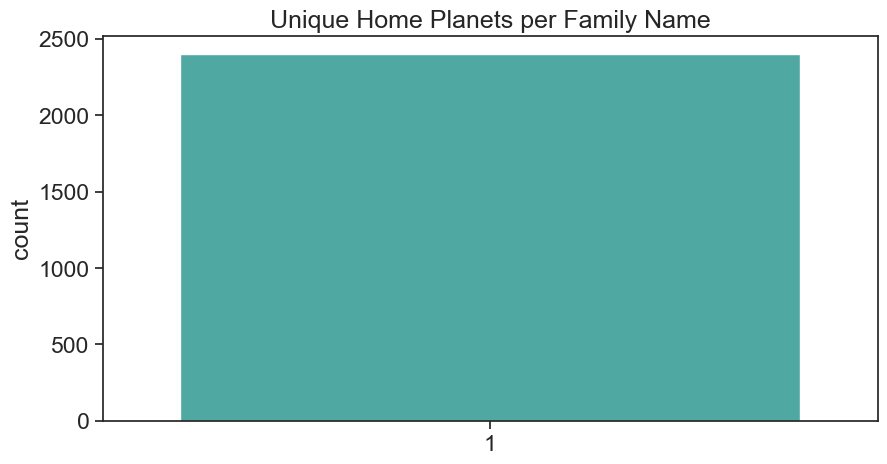

In [687]:
# Check if family name has a relation with HomePlanet

FamilyName_HomePlanet=titanic_df.groupby(['FamilyName','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,5))
sns.countplot((FamilyName_HomePlanet>0).sum(axis=1), color = '#40b7ad' )
plt.title('Unique Home Planets per Family Name')

print(FamilyName_HomePlanet)


#This demonstrates that people with the same last name comes from the same home planet.

In [688]:
#Checking for one of the last names to ensure that's the case

titanic_df[titanic_df['FamilyName']== 'Watuald'] #,'Ambleetive','Bache','Watuald')]

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,...,Deck,Number_Port_Starboard,PassangerId_Group,PassangerId_Group_Size,SoloTravel,CabinNum,Side,FirstName,FamilyName,FamilySize
3811,3811,4071_01,Europa,True,B/127/P,NaN,NaN,False,0.0,0.0,...,B,127/P,4071,2,0,127,P,Alurope,Watuald,5.0
3812,3812,4071_02,Europa,True,B/127/P,55 Cancri e,22.0,False,0.0,0.0,...,B,127/P,4071,2,0,127,P,Tachir,Watuald,5.0
4275,4275,4553_01,Europa,False,C/143/P,PSO J318.5-22,55.0,True,0.0,102.0,...,C,143/P,4553,1,1,143,P,Auvam,Watuald,5.0
10115,1422,3046_01,NaN,False,D/93/P,TRAPPIST-1e,45.0,False,0.0,2203.0,...,D,93/P,3046,1,1,93,P,Neutrix,Watuald,5.0
12692,3999,8713_01,Europa,False,B/282/P,55 Cancri e,29.0,False,0.0,483.0,...,B,282/P,8713,2,0,282,P,Majoth,Watuald,5.0


Since all Family Names only have one unique Home Planet, we can fill nulls using Family Name

As part of the exploratory data analysis, we found out that there were 201 null values under the home plant column and that corresponded to around 2.3% of the values. To find out the best way, and potentially the most accurate way to fill in this categorical value, would be to find a relationship with some other variable. Therefore, it would make sense that people with the same last name could potentially come from the same place. In order to validate this theory, we grouped the last names to see if there were last names in more than one home planet. With this visualization, it’s possible to see that regardless of how many people with the same last name there was, they all came from the same HomePlanet. For instance, for the “Admingried” there are 4 passengers but they all come from Europa, while for “Adavisons” there are 10, but they all come from Earth. This contributes to fill in the null values corresponding to their last name. Therefore, if there was any “Adavisons” with no home planet, we inputted the Earth as the missing value. While there is no way of ensuring this is the correct value to be inputted, it is an assumption made that describes the relationship between home planet and last name.  

In [689]:
# Find passagers where HomePlanet = NaN 
# and we know the HomePlanet from the FamilyName

#Fill in missing HomePlanet based on last name
#FamilyName_HomePlanet_i=titanic_df[titanic_df['HomePlanet'].isna()] \
#                        [(titanic_df[titanic_df['HomePlanet'].isna()] \
#                        ['FamilyName']).isin(FamilyName_HomePlanet.index)].index

# Fill missing values using idmax: Return index of first occurrence of maximum over requested axis
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

#titanic_df.loc[FamilyName_HomePlanet_i,'HomePlanet']=titanic_df.iloc \
#                                               [FamilyName_HomePlanet_i,:]['FamilyName'] \
#                                               .map(lambda x: FamilyName_HomePlanet.idxmax(axis=1)[x])


#print('New missing values for HomePlanet:',titanic_df['HomePlanet'].isna().sum())


<AxesSubplot:xlabel='HomePlanet', ylabel='Deck'>

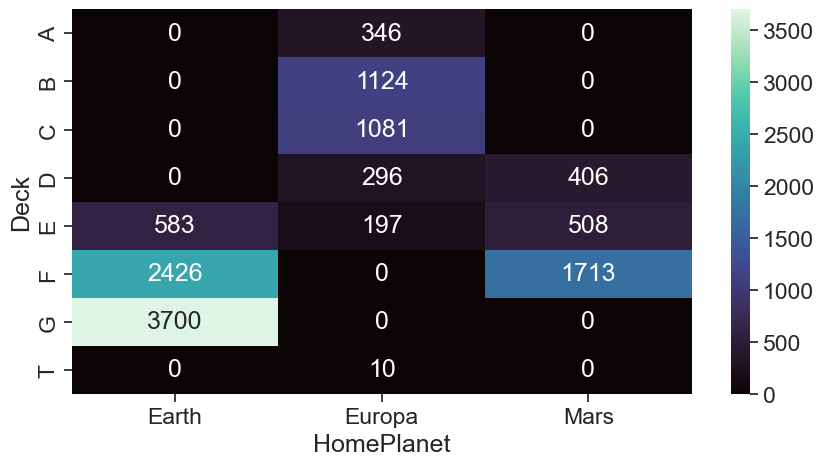

In [690]:
# Check if deck has a relation with HomePlanet


#Group by Deck and HomePlanet to see correlation
Deck_HomePlanet=titanic_df.groupby(['Deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(Deck_HomePlanet, annot=True, fmt='g', cmap='mako')

We can notice that all passengers from Deck A, B, C, T comes from Europe and all the passengers from Deck G comes only from Earth

In [691]:
# We're only going to input decks that are unique planets

# Europa: A, B, C and T
#titanic_df.loc[(titanic_df['HomePlanet'].isna())  
#               & (titanic_df['Deck'].isin(['A', 'B', 'C', 'T'])), 
#               'HomePlanet'] = 'Europa'

# Earth: G
#titanic_df.loc[(titanic_df['HomePlanet'].isna()) 
#               & (titanic_df['Deck'] == 'G'), 
#               'HomePlanet'] = 'Earth'

#print('New missing values for HomePlanet:',titanic_df['HomePlanet'].isna().sum())


<AxesSubplot:xlabel='HomePlanet', ylabel='Destination'>

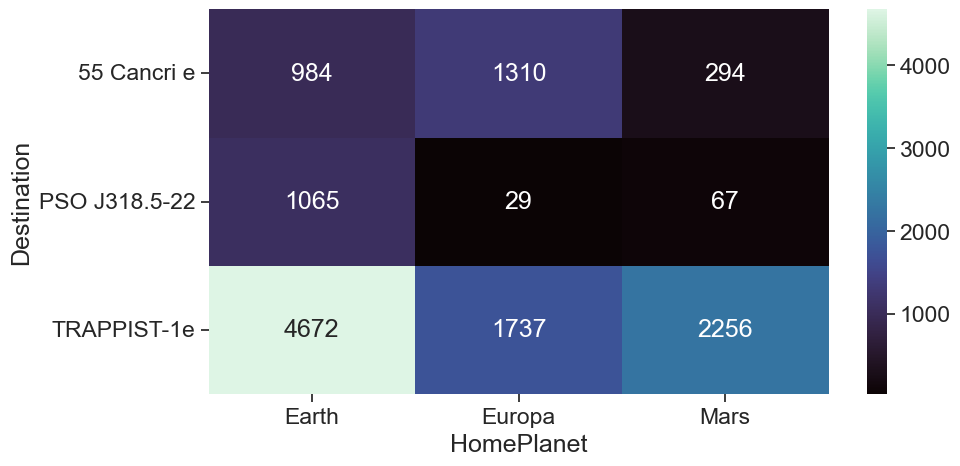

In [692]:
#Understanding the relationship between destination and HomePlanet

#Check if destination has a relation with HomePlanet by using groupby
Deck_HomePlanet=titanic_df.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(Deck_HomePlanet, annot=True, fmt='g', cmap='mako')

No individual and unique correlation about between HomePlanet and Destination, so we hve decided to full in the values with the mode.

In [693]:
# Europa Home Planet: Decks A, B, C and T
#titanic_df.loc[(titanic_df['HomePlanet'].isna())  
#               & (titanic_df['Destination'] == 'TRAPPIST-1e'), 
#               'HomePlanet'] = 'Earth'

#print('New missing values for HomePlanet:',titanic_df['HomePlanet'].isna().sum())


In [694]:
# Input missing value with mode


#titanic_df['HomePlanet'].fillna(titanic_df['HomePlanet'].mode()[0], inplace=True)

#print('New missing values for HomePlanet:',titanic_df['HomePlanet'].isna().sum())

**Destination**

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
FamilyName                                          
Acobson              1.0            0.0          4.0
Acobsond             2.0            0.0          6.0
Adavisons            1.0            1.0          8.0
Adkinson             0.0            1.0          3.0
Admingried           1.0            0.0          3.0
...                  ...            ...          ...
Wynneyerson          1.0            0.0          1.0
Yanton               1.0            1.0          6.0
Yatters              1.0            0.0          7.0
Yorkland             2.0            3.0          8.0
Youngrayes           2.0            0.0          5.0

[2402 rows x 3 columns]


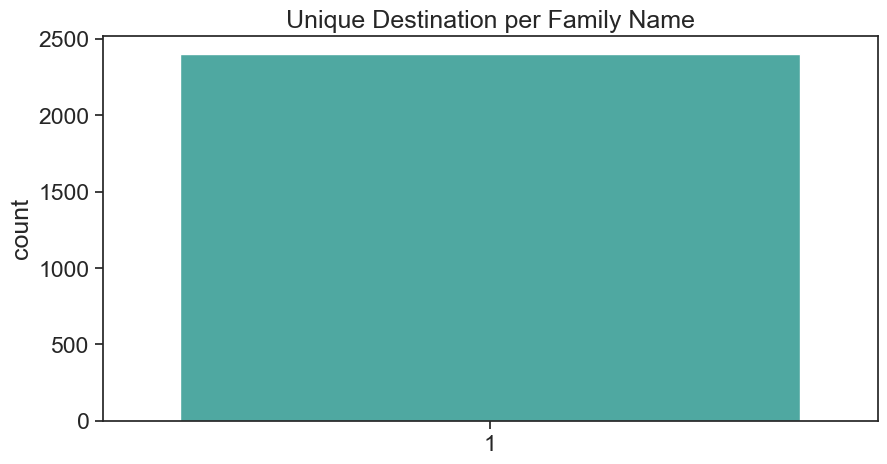

In [695]:
# Check if family name has a relation with Destination

FamilyName_Destination=titanic_df.groupby(['FamilyName','Destination'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,5))
sns.countplot((FamilyName_HomePlanet>0).sum(axis=1), color = '#40b7ad' )
plt.title('Unique Destination per Family Name')

print(FamilyName_Destination)

Since all Family Names only have one unique Destination, we can fill nulls using Family Name.

In [696]:
#Get the null values for Destionation but that has familyname


# Find passagers where Destination = NaN 
# and we know the Destination from the FamilyName

#FamilyName_Destination_i=titanic_df[titanic_df['Destination'].isna()] \
#                        [(titanic_df[titanic_df['Destination'].isna()] \
#                        ['FamilyName']).isin(FamilyName_Destination.index)].index

# Fill missing values using idmax: Return index of first occurrence of maximum over requested axis
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

#titanic_df.loc[FamilyName_Destination_i,'Destination']=titanic_df.iloc \
#                                               [FamilyName_Destination_i,:]['FamilyName'] \
#                                               .map(lambda x: FamilyName_Destination.idxmax(axis=1)[x])


#print('New missing values for Destination:',titanic_df['Destination'].isna().sum())


In [697]:
# Input rest of missing values with mode destination
#titanic_df['Destination'].fillna(titanic_df['Destination'].mode()[0], inplace=True)

#print('New missing values for Destination:',titanic_df['Destination'].isna().sum())

After doing different techniques of filling nulls, it was concluded that the most effective way in terms of what technique gave the higher score was using mean for numeric values, mode for categorical and a constant in some specific cases. Even though the analysis produced before was a more specific way of doing it, it was more efficient to use Simple Imputer. 

In [698]:
for i in titanic_df.columns:
    print(f"'{i}',")

'index',
'PassengerId',
'HomePlanet',
'CryoSleep',
'Cabin',
'Destination',
'Age',
'VIP',
'RoomService',
'FoodCourt',
'ShoppingMall',
'Spa',
'VRDeck',
'Name',
'Transported',
'set',
'PassengerID_Group',
'PassengerID_member',
'Deck',
'Number_Port_Starboard',
'PassangerId_Group',
'PassangerId_Group_Size',
'SoloTravel',
'CabinNum',
'Side',
'FirstName',
'FamilyName',
'FamilySize',


## Filling Nulls Using Simple Imputer

Use simple imputer to fill out the missing values.

In [699]:
# Create imputer
constant_imputer = SimpleImputer(strategy='constant')
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')
                             

# Fill out missing values with 0s.
titanic_df[['RoomService']] = constant_imputer.fit_transform(titanic_df[['RoomService']])
titanic_df[['FoodCourt']] = constant_imputer.fit_transform(titanic_df[['FoodCourt']])
titanic_df[['ShoppingMall']] = constant_imputer.fit_transform(titanic_df[['ShoppingMall']])
titanic_df[['Spa']] = constant_imputer.fit_transform(titanic_df[['Spa']])
titanic_df[['VRDeck']] = constant_imputer.fit_transform(titanic_df[['VRDeck']])


# Fill out missing values with the mean for numeric features and mode for categorical.
for i in titanic_df.columns:
    if titanic_df[i].dtype == 'O':
        imp_mode = mode_imputer.fit(np.array(titanic_df[i]).reshape(-1, 1))
        titanic_df[i] = imp_mode.transform(np.array(titanic_df[i]).reshape(-1, 1))
    elif titanic_df[i].dtype == 'float' or titanic_df[i].dtype == 'int':
        imp_mean = mean_imputer.fit(np.array(titanic_df[i]).reshape(-1, 1))
        titanic_df[i] = imp_mean.transform(np.array(titanic_df[i]).reshape(-1, 1))

titanic_df.VIP = titanic_df.VIP.astype('bool')
        

Create Total Expenditure to make new CryoSleep column with no nulls based on expenditure, as people in cryosleep wouldn't  have any expenditures.

In [700]:
# Creating total ammenities expenditure
titanic_df['TotalExpenditure']= titanic_df['RoomService']+titanic_df['Spa']+titanic_df['VRDeck']+titanic_df['FoodCourt']+titanic_df['ShoppingMall']

# Make and fill out new Cryosleep
titanic_df['Cryosleep'] = 0

titanic_df.loc[titanic_df['TotalExpenditure'] == 0, 'Cryosleep'] = 1
titanic_df.loc[titanic_df.CryoSleep.astype('str') == 'True', 'Cryosleep'] = 1
titanic_df.loc[titanic_df.CryoSleep.astype('str') == 'False', 'Cryosleep'] = 0

titanic_df['Cryosleep'] = titanic_df['Cryosleep'].astype('bool')
titanic_df['CryoSleep'] = titanic_df['Cryosleep']
titanic_df.drop('Cryosleep',axis=1,inplace=True)

In [701]:
titanic_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,218.378026,441.890979,170.779491,301.722282,300.450270
std,641.766201,1568.038076,584.153630,1118.746785,1168.655639
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.750000,62.750000,23.000000,50.000000,36.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [702]:
titanic_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


Fill out nulls in Cabin

In [703]:
#Drop Columns Created from the Cabin Column with nulls
titanic_df.drop('Deck',axis=1,inplace=True)
titanic_df.drop('CabinNum',axis=1,inplace=True)
titanic_df.drop('Side',axis=1,inplace=True)


# Fill nulls Cabin
titanic_df['Cabin'] = titanic_df.Cabin.fillna(method='ffill')


## Further Feature Engineering

In [704]:
# Create Adults and Spending Columns
titanic_df['Adults'] = titanic_df['Age'] >= 13
titanic_df['Adult_and_spending'] = (titanic_df['TotalExpenditure'] > 0) & (titanic_df['Age'] >=13)

In [705]:
# Create New Features From PassengerID and Cabin
titanic_df['Group_nums'] = titanic_df.PassengerId.apply(lambda x: x.split('_')).apply(lambda x: x[0])
titanic_df['Grouped'] = ((titanic_df['Group_nums'].value_counts() > 1).reindex(titanic_df['Group_nums'])).tolist()
titanic_df['Deck'] = titanic_df.Cabin.apply(lambda x: str(x).split('/')).apply(lambda x: x[0])
titanic_df['Side'] = titanic_df.Cabin.apply(lambda x: str(x).split('/')).apply(lambda x: x[2])
titanic_df['Has_expenses'] = titanic_df['TotalExpenditure'] > 0
titanic_df['Is_Embryo'] = titanic_df['Age'] == 0

titanic_df['Group_nums'] = titanic_df['Group_nums'].astype('float')

In [706]:
#Creating variables for different type of expenses
titanic_df['Essentials']= titanic_df[['FoodCourt','ShoppingMall']].sum(axis=1)

titanic_df['Luxury']= titanic_df[['RoomService','Spa', 'VRDeck']].sum(axis=1)

#Creating variables for food based costs
titanic_df['FoodExpenditure']= titanic_df['RoomService']+titanic_df['FoodCourt']+titanic_df['ShoppingMall']

# Apply log transform of each expenditure variable
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExpenditure', 'Essentials', 'Luxury']:
    titanic_df[f'log_{col}']=np.log(1+titanic_df[col])
                                                                                        
#Creating bins for Ages
# New features
titanic_df['Age_group']=np.nan
titanic_df.loc[titanic_df['Age']<=9,'Age_group']=1
titanic_df.loc[(titanic_df['Age']>9) & (titanic_df['Age']<=17),'Age_group']=2
titanic_df.loc[(titanic_df['Age']>17) & (titanic_df['Age']<=23),'Age_group']=3
titanic_df.loc[(titanic_df['Age']>23) & (titanic_df['Age']<=30),'Age_group']=4
titanic_df.loc[(titanic_df['Age']>30) & (titanic_df['Age']<=40),'Age_group']=5
titanic_df.loc[(titanic_df['Age']>40) & (titanic_df['Age']<=50),'Age_group']=6
titanic_df.loc[titanic_df['Age']>50,'Age_group']=7

#Creating bins for Log Amentinies
# New features - training set
titanic_df['log_TotalExpenditure_null']=np.nan
titanic_df.loc[titanic_df['log_TotalExpenditure']<=3,'log_TotalExpenditure_null']=1
titanic_df.loc[(titanic_df['log_TotalExpenditure']>3) & (titanic_df['log_TotalExpenditure']<=6),'log_TotalExpenditure_null']=2
titanic_df.loc[(titanic_df['log_TotalExpenditure']>6) & (titanic_df['log_TotalExpenditure']<=8),'log_TotalExpenditure_null']=3
titanic_df.loc[titanic_df['log_TotalExpenditure']>8,'log_TotalExpenditure_null']=4

#FE with room service and food court
titanic_df['RoomService_to_FoodCourt'] = titanic_df['RoomService']*titanic_df['FoodCourt']

#FE with CryoSleep and total expenditure
titanic_df['cryosleep_totalexpenditure'] = titanic_df['CryoSleep']*titanic_df['TotalExpenditure']

#FE with CryoSleep and Room Service
titanic_df['cryosleep_roomservice'] = titanic_df['CryoSleep']*titanic_df['RoomService']

#FE with CryoSleep and Room Service
titanic_df['cryosleep_roomservice'] = titanic_df['CryoSleep']*titanic_df['RoomService']

#FE with Total Expenditure and Shopping Mall
titanic_df['ShoppingMall_TotalExpenditure'] = titanic_df['ShoppingMall']*titanic_df['TotalExpenditure']

#FE with Log Total Expenditure and FoodCourt
titanic_df['LogTotalExpenditure_FoodCourt'] = titanic_df['FoodCourt']*titanic_df['log_TotalExpenditure']

In [707]:
# log of each expenditure variabl
titanic_df['log_TotalExpenditure'] = np.log(1+titanic_df['TotalExpenditure'])
titanic_df['log_RoomService'] = np.log(1 + titanic_df['RoomService'])
titanic_df['log_Spa'] = np.log(1+titanic_df['Spa'])
titanic_df['log_VRDeck'] = np.log(1+titanic_df['VRDeck'])
titanic_df['log_FoodCourt'] = np.log(1+titanic_df['FoodCourt'])
titanic_df['log_ShoppingMall'] = np.log(1+titanic_df['ShoppingMall'])

In [708]:
# OneHot encode HomePlanet, Destination, Deck, and Side

#Encode a categorical feature
# print(titanic_df['HomePlanet'].value_counts(),'n/')
# print(titanic_df['Destination'].value_counts(),'n/')
# print(titanic_df['Deck'].value_counts(),'n/')
# print(titanic_df['Side'].value_counts(),'n/')
encodes = ['HomePlanet', 'Destination', 'Deck', 'Side']

planet = pd.get_dummies(titanic_df['HomePlanet'],prefix='HomePlanet').astype('bool')
destination = pd.get_dummies(titanic_df['Destination'],prefix='Destination').astype('bool')
deck = pd.get_dummies(titanic_df['Deck'],prefix='Deck').astype('bool')
side = pd.get_dummies(titanic_df['Side'],prefix='Side').astype('bool')

#encoding begins
titanic_df = pd.concat([titanic_df, planet, destination, deck, side],axis=1)


In [709]:
print('Sum of nulls:')
titanic_df.isnull().sum()

Sum of nulls:


index          0
PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
              ..
Deck_F         0
Deck_G         0
Deck_T         0
Side_P         0
Side_S         0
Length: 68, dtype: int64

Feature Engineering was performed on the dataset. The code creates a new feature which is calculated by summing the expenses per passenger for room service, shopping mall and food service. Bins were also used in order to assign each passenger to a specific age group. Feature Engineering was done by creating new variables that are actually two old variables that were put together. This was done in order to identify and create new features that are relevant to the data. This will help train the machine learning data that will eventually predict is a passenger is transported or not. 

## Correlation Matrix after Feature Engineering

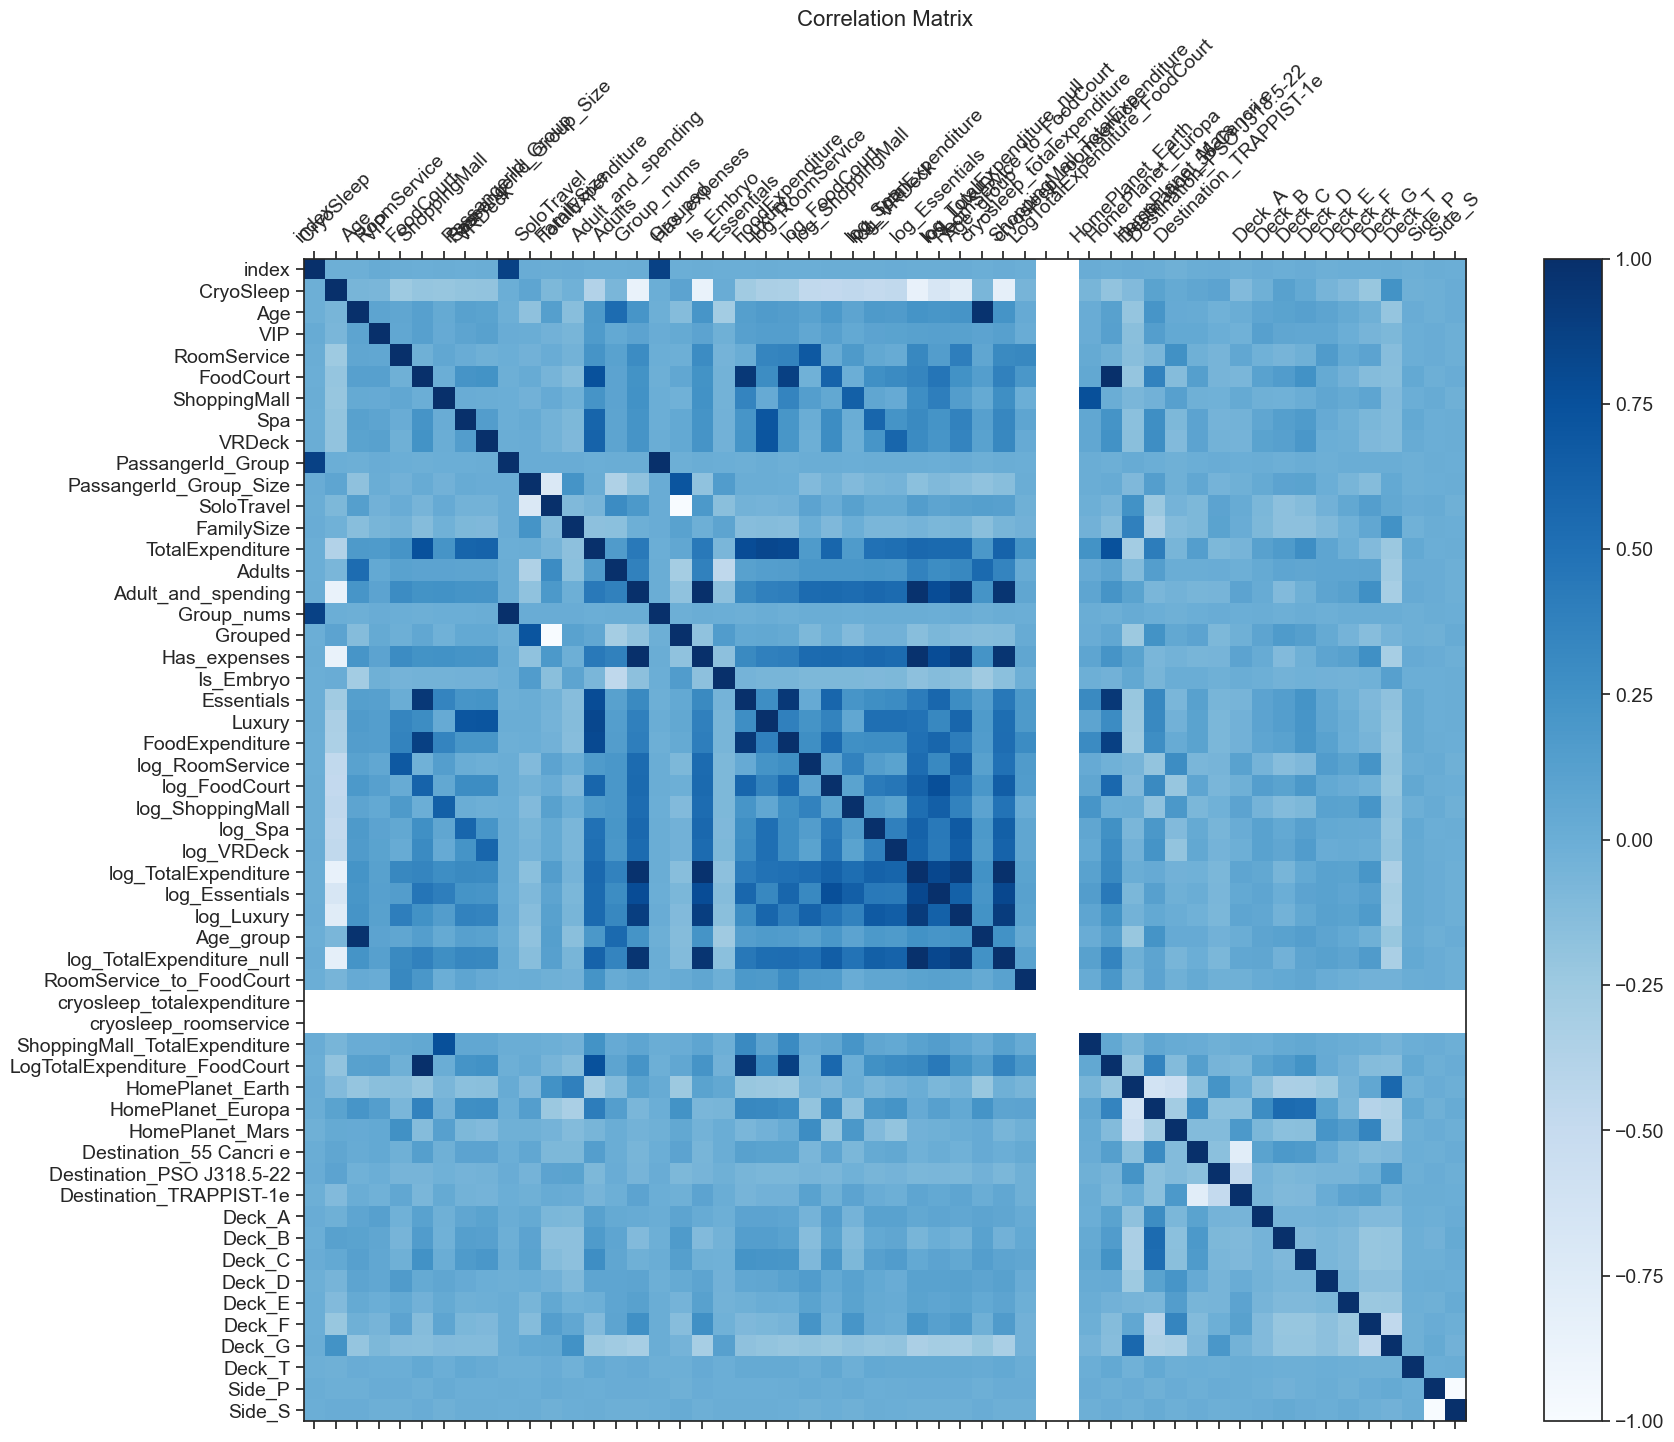

In [710]:
#Understanding the correlation between the variables after feature engineering (creating matrix)

#setting correlation variable
data_corr = titanic_df.corr()

#creating the matrix
corr_matrix = plt.figure(figsize=(20, 15))
plt.matshow(data_corr, fignum=corr_matrix.number, cmap = 'Blues')
plt.xticks(range(data_corr.shape[1]),
           data_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(data_corr.shape[1]), 
           data_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
#Understanding the correlation between the variables (creating matrix)

In [711]:
titanic_df.columns[titanic_df.isna().any()].tolist()

[]

## Split DataSets

In [712]:
# Split the DataFrame into two based on the 'set' column
titanic_train = titanic_df[titanic_df['set'] == 'Training']
titanic_test = titanic_df[titanic_df['set'] == 'Testing']

In [713]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          12970 non-null  float64
 1   PassengerId                    12970 non-null  object 
 2   HomePlanet                     12970 non-null  object 
 3   CryoSleep                      12970 non-null  bool   
 4   Cabin                          12970 non-null  object 
 5   Destination                    12970 non-null  object 
 6   Age                            12970 non-null  float64
 7   VIP                            12970 non-null  bool   
 8   RoomService                    12970 non-null  float64
 9   FoodCourt                      12970 non-null  float64
 10  ShoppingMall                   12970 non-null  float64
 11  Spa                            12970 non-null  float64
 12  VRDeck                         12970 non-null 

In [714]:
titanic_train['Transported'] = titanic_train['Transported'].astype('bool')

# Models

## FINAL MODEL USED: Tuned Gradient Booster Classifier

One of the models tested was gradient boosting which is commonly used for classification. However, since there were many variables that the range varied significantly, we decided to use log transformation. These varibles included the log for: total expenditure, room service, spa, VRDeck, food court, shopping mall, age group, and total expenditure. Log is used to help normalize the distribution of the variable and therefore improving the performance and accuracy of the model. With the loc function, we can get the first few values of the log transformed variables and make a comparison between them. With these variables, we can understand the relationship between these amenities and what they say about the passengers on board. Log transformation is a useful tool for normalizing the distribution of variables and improving the performance of classification models. These variables were used for the Gradient Boosting model and for that contribute to the prediction of the transported passengers.

In [715]:
# After running feature importance, we only kept the variables that are most
# relevant for the model

GB_features = [#'CryoSleep',
                'Age',
                #'RoomService',
                #'FoodCourt',
                #'ShoppingMall',
                'Spa',
                'VRDeck',
                #'set',
                #'PassangerId_Group',
                #'PassangerId_Group_Size',
                #'SoloTravel',
                'FamilySize',
                #'TotalExpenditure',
                #'Adults',
                #'Adult_and_spending',
                'Group_nums',
                #'Grouped',
                #'Has_expenses',
                #'Is_Embryo',
                #'Essentials',
                #'Luxury',
                'FoodExpenditure',
                'log_RoomService',
                'log_FoodCourt',
                'log_ShoppingMall',
                #'log_Spa',
                #'log_VRDeck',
                'log_TotalExpenditure',
                'log_Essentials',
                'log_Luxury',
                'Age_group',
                #'log_TotalExpenditure_null',
                #'RoomService_to_FoodCourt',
                #'cryosleep_totalexpenditure',
                #'cryosleep_roomservice',
                'ShoppingMall_TotalExpenditure',
                #'LogTotalExpenditure_FoodCourt',
                'HomePlanet_Earth',
                #'HomePlanet_Europa',
                #'HomePlanet_Mars',
                #'Destination_55 Cancri e',
                #'Destination_PSO J318.5-22',
                #'Destination_TRAPPIST-1e',
                #'Deck_A',
                #'Deck_B',
                #'Deck_C',
                #'Deck_D',
                'Deck_E',
                'Deck_F',
                'Deck_G',
                'Deck_T',
                #'Side_P',
                #'Side_S'
           ]           

In [716]:
#X = pd.get_dummies(titanic_train[GB_features])

X = titanic_train[GB_features]
y = titanic_train['Transported']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

**Hyper Parameter Tuning**

In [717]:
#gbc = GradientBoostingClassifier()

#parameters = {
#    'n_estimators': [100, 500, 1000],
#    'learning_rate': [0.01, 0.1, 0.5],
#    'max_depth': [3, 5, 7],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['none', 'auto', 'sqrt', 'log2']
#}

#cv = RandomizedSearchCV(gbc, parameters, n_iter=25, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)
#cv.fit(X, y)
#cv.best_params_

In [718]:
gbc1 = GradientBoostingClassifier(n_estimators=100,
                                  min_samples_split=10,
                                  min_samples_leaf=4,
                                  max_features='sqrt', 
                                  max_depth= 7, 
                                  learning_rate=0.1) #best params from gbc

model_fit = gbc1.fit(X,y)

# PREDICTING on the response variable
model_train_pred = model_fit.predict(X_train)
model_valid_pred = model_fit.predict(X_test)

# SCORING the results (accuracy)
model_train_score = gbc1.score(X_train, y_train).round(4) # training accuracy
model_valid_score = gbc1.score(X_test, y_test).round(4) # validation accuracy

# SCORING the results (auc)
model_train_auc = roc_auc_score(y_true  = y_train,
                                y_score = model_train_pred).round(decimals = 4)

model_valid_auc = roc_auc_score(y_true  = y_test,
                                y_score = model_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)


Training Accuracy:   0.8892
Validation Accuracy: 0.896
Training AUC:        0.8892
Validation AUC:      0.8952


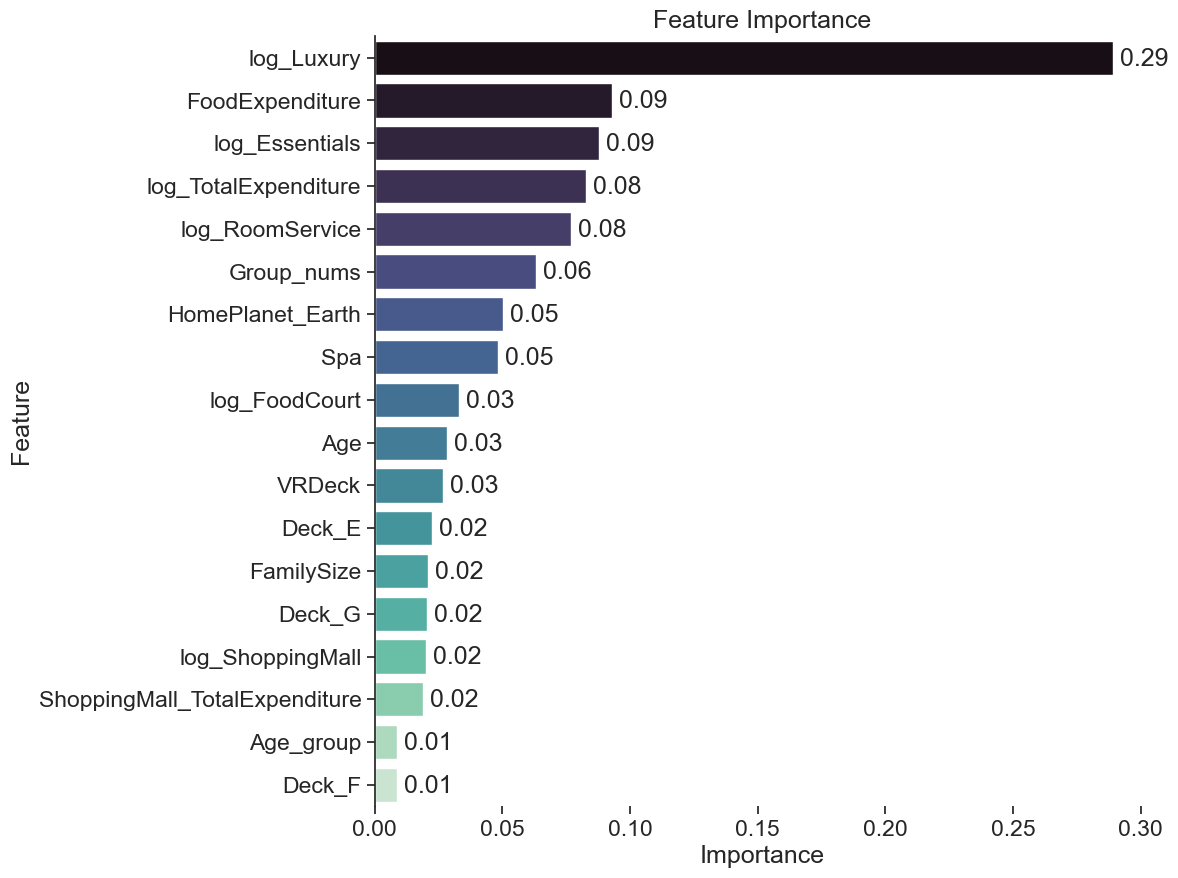

In [719]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbc1.feature_importances_, X_train.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

In [720]:
#Save output on a csv file

pred_y_gbr2 = gbc1.predict(titanic_test[GB_features])

gbc_out = pd.DataFrame({'PassengerId':titanic_test.PassengerId, 'Transported':pred_y_gbr2}).reset_index()
gbc_out = gbc_out.drop('index', axis = 1)
gbc_out.to_csv('SubmissionV1.csv',index=False)

gbc_out.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


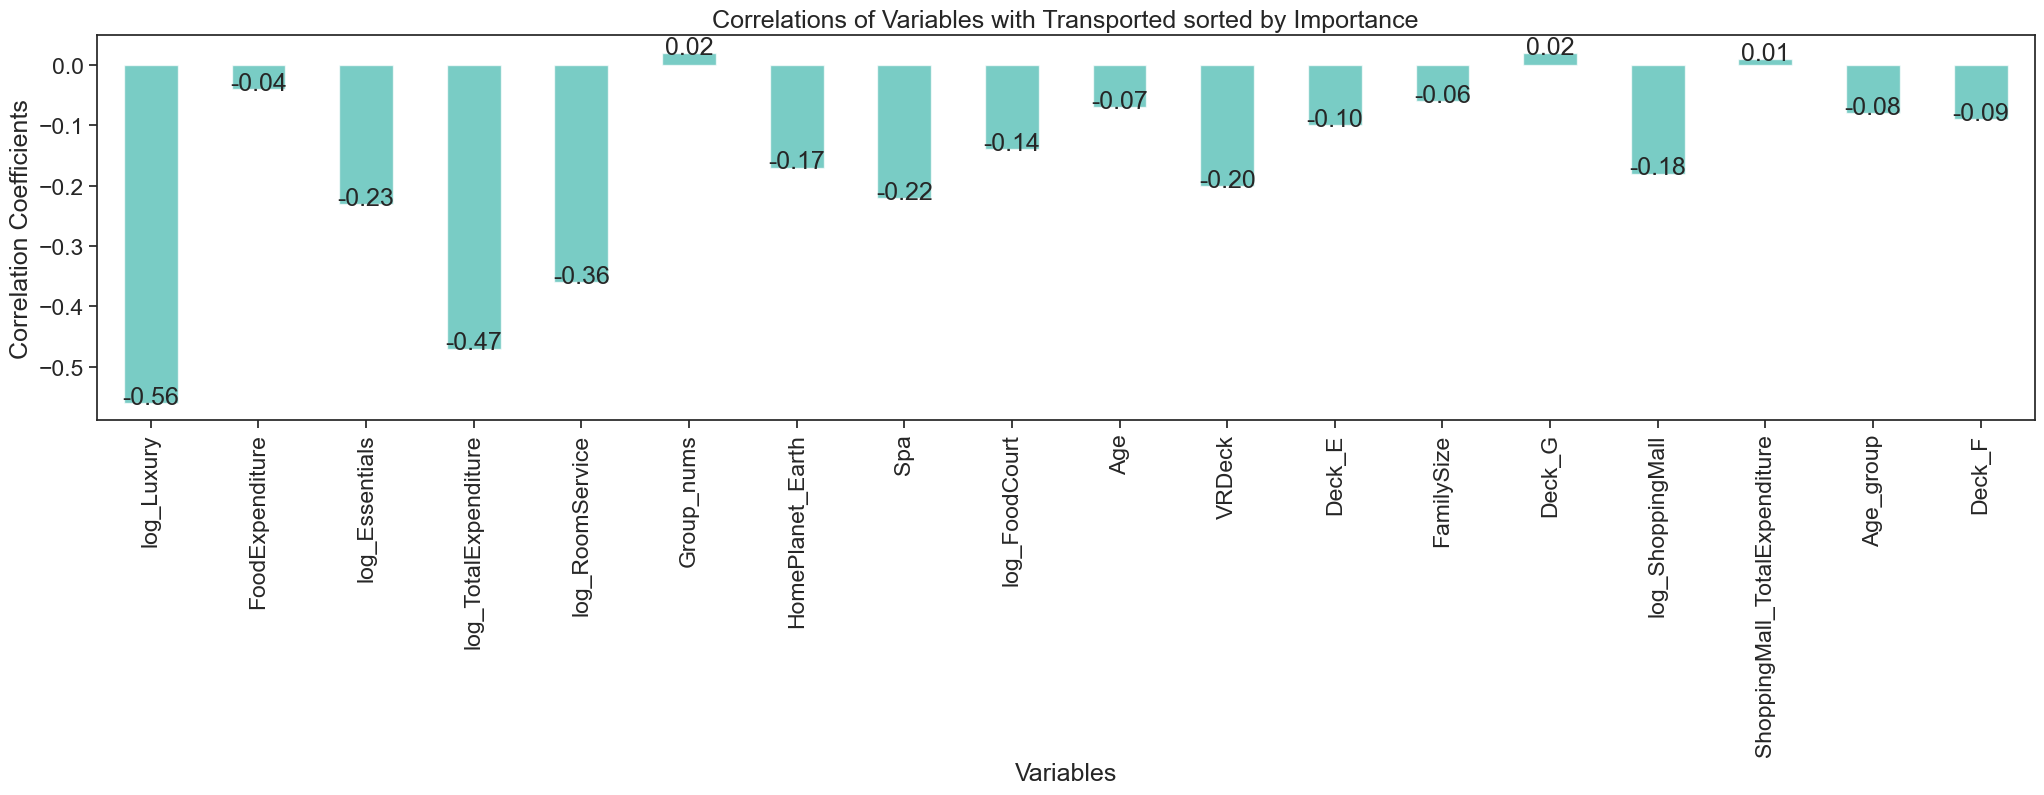

In [721]:
# Plot correlation coefficients of "Transported" with other variables:

# Create correlation dataframe and sort
corr = pd.DataFrame(titanic_train.corr()['Transported'] \
                    .sort_values(ascending = False)\
                    .round(2))

# Filter for selected features
corr = corr.loc[['Age',
                'Spa',
                'VRDeck',
                'FamilySize',
                'Group_nums',
                'FoodExpenditure',
                'log_RoomService',
                'log_FoodCourt',
                'log_ShoppingMall',
                'log_TotalExpenditure',
                'log_Essentials',
                'log_Luxury',
                'Age_group',
                'ShoppingMall_TotalExpenditure',
                'HomePlanet_Earth',
                'Deck_E',
                'Deck_F',
                'Deck_G',
                'Deck_T']]


corr_featureimp = pd.merge(corr, feature_imp,  
                   left_index=True, 
                   right_index=True, 
                   how = 'inner').sort_values(by = 'Importance', ascending = False)

corr_featureimp['Correlation'] = corr_featureimp['Transported']

corr_featureimp.drop(columns=['Transported'])


# Plot bar plot


ax = corr_featureimp.loc[:,'Correlation'].plot(kind = 'bar', color = '#40b7ad', alpha = 0.7, figsize=(25,5))

ax.set_title('Correlations of Variables with Transported sorted by Importance')
ax.set_xlabel('Variables')
ax.set_ylabel('Correlation Coefficients')



# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 4),
                textcoords='offset points')
    
plt.show()

In [722]:
# User defined functions


########################################
# confusion_matrix
########################################
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='mako_r'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("""
Normalized confusion matrix""")
#    else:
#        print("""
#Confusion matrix, without normalization""")

#    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Source of function: ML with Python by IBM on Coursera

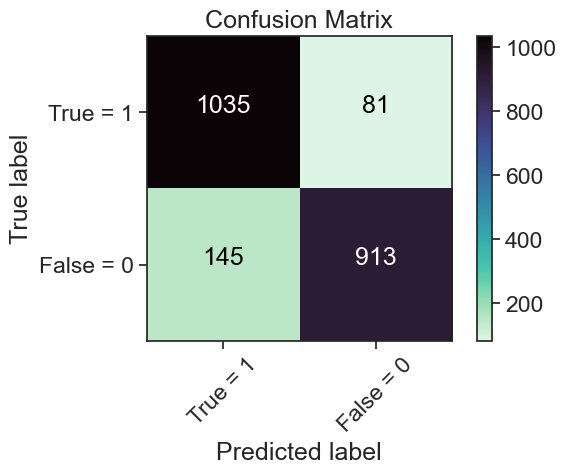

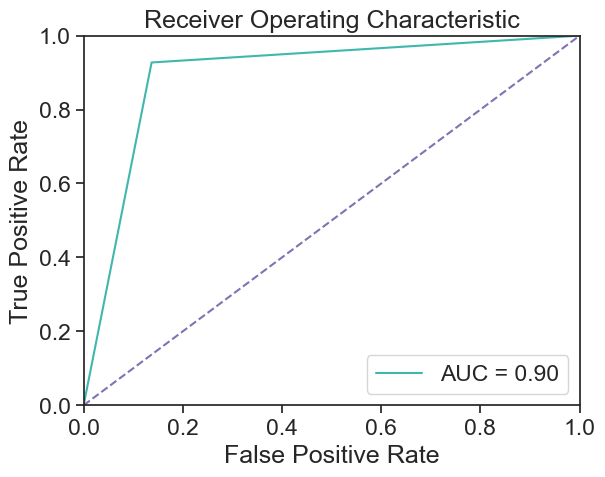

In [723]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, model_valid_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['True = 1','False = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = model_fit.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, model_valid_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, '#40b7ad', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

## Other Models Tested: Decision Tree, Tuned Random Forest, Tuned GBC and Stacking

Three different models were used, Decision Tree, Tuned Random Forest and Tuned GBC before stacking them. According to theory, to do stacking the training data set needs to be split in two parts (Harrison, 2022). The first part is then used to train the main models, and the other half is then used to predict as well as the test data. Then, a new model is trained on the second half of the train data using the previous predictions as features for the second-level model. In this case, Logistic Regression was used for model stacking.

In [724]:
training = titanic_df.drop(['HomePlanet','Cabin','Deck','Name',
                            'FirstName','FamilyName','Transported',
                            'Side','Destination','VIP'],axis = 1)

In [725]:
#for i in training.columns:
#    print(f"'{i}',")

The features were selected for each model starting with all features by conducting feature importance. Then, features were cut out until all of the ones remaining had an importance greater than zero.

In [726]:
# Create feature groups dictionary. 

features_dict = {
   'tree_sig'              : [#'CryoSleep',
                            'Age',
                            #'RoomService',
                            #'FoodCourt',
                            #'ShoppingMall',
                            #'Spa',
                            #'VRDeck',
                            #'set',
                            #'PassangerId_Group',
                            #'PassangerId_Group_Size',
                            #'SoloTravel',
                            #'FamilySize',
                            #'TotalExpenditure',
                            #'Adults',
                            #'Adult_and_spending',
                            'Group_nums',
                            #'Grouped',
                            #'Has_expenses',
                            #'Is_Embryo',
                            #'Essentials',
                            #'Luxury',
                            #'FoodExpenditure',
                            #'log_RoomService',
                            #'log_FoodCourt',
                            'log_ShoppingMall',
                            #'log_Spa',
                            #'log_VRDeck',
                            'log_TotalExpenditure',
                            'log_Essentials',
                            'log_Luxury',
                            #'Age_group',
                            #'log_TotalExpenditure_null',
                            #'RoomService_to_FoodCourt',
                            #'cryosleep_totalexpenditure',
                            #'cryosleep_roomservice',
                            #'ShoppingMall_TotalExpenditure',
                            #'LogTotalExpenditure_FoodCourt',
                            'HomePlanet_Earth',
                            #'HomePlanet_Europa',
                            #'HomePlanet_Mars',
                            #'Destination_55 Cancri e',
                            #'Destination_PSO J318.5-22',
                            #'Destination_TRAPPIST-1e',
                            #'Deck_A',
                            #'Deck_B',
                            #'Deck_C',
                            #'Deck_D',
                            'Deck_E',
                            'Deck_F',
                            'Deck_G',
                            'Deck_T',
                            #'Side_P',
                            #'Side_S'
    ], 

    
   'rf_tuned'              : ['CryoSleep',
                            #'Age',
                            #'RoomService',
                            'FoodCourt',
                            #'ShoppingMall',
                            #'Spa',
                            'VRDeck',
                            #'set',
                            'PassangerId_Group',
                            #'PassangerId_Group_Size',
                            #'SoloTravel',
                            #'FamilySize',
                            #'TotalExpenditure',
                            #'Adults',
                            'Adult_and_spending',
                            'Group_nums',
                            #'Grouped',
                            'Has_expenses',
                            #'Is_Embryo',
                            'Essentials',
                            'Luxury',
                            'FoodExpenditure',
                            'log_RoomService',
                            #'log_FoodCourt',
                            'log_ShoppingMall',
                            'log_Spa',
                            #'log_VRDeck',
                            'log_TotalExpenditure',
                            #'log_Essentials',
                            #'log_Luxury',
                            #'Age_group',
                            'log_TotalExpenditure_null',
                            #'RoomService_to_FoodCourt',
                            'cryosleep_totalexpenditure',
                            'cryosleep_roomservice',
                            #'ShoppingMall_TotalExpenditure',
                            'LogTotalExpenditure_FoodCourt',
                            'HomePlanet_Earth',
                            'HomePlanet_Europa',
                            #'HomePlanet_Mars',
                            #'Destination_55 Cancri e',
                            #'Destination_PSO J318.5-22',
                            #'Destination_TRAPPIST-1e',
                            #'Deck_A',
                            #'Deck_B',
                            #'Deck_C',
                            #'Deck_D',
                            #'Deck_E',
                            'Deck_F',
                            'Deck_G',
                            #'Deck_T',
                            #'Side_P',
                            #'Side_S'
    ], 

    
   'gbc_tuned'             : ['CryoSleep',
                            #'Age',
                            #'RoomService',
                            'FoodCourt',
                            #'ShoppingMall',
                            'Spa',
                            #'VRDeck',
                            #'set',
                            #'PassangerId_Group',
                            #'PassangerId_Group_Size',
                            #'SoloTravel',
                            #'FamilySize',
                            'TotalExpenditure',
                            #'Adults',
                            'Adult_and_spending',
                            'Group_nums',
                            #'Grouped',
                            #'Has_expenses',
                            #'Is_Embryo',
                            #'Essentials',
                            #'Luxury',
                            #'FoodExpenditure',
                            'log_RoomService',
                            #'log_FoodCourt',
                            #'log_ShoppingMall',
                            #'log_Spa',
                            'log_VRDeck',
                            #'log_TotalExpenditure',
                            'log_Essentials',
                            'log_Luxury',
                            #'Age_group',
                            'log_TotalExpenditure_null',
                            #'RoomService_to_FoodCourt',
                            #'cryosleep_totalexpenditure',
                            #'cryosleep_roomservice',
                            #'ShoppingMall_TotalExpenditure',
                            'LogTotalExpenditure_FoodCourt',
                            'HomePlanet_Earth',
                            'HomePlanet_Europa',
                            #'HomePlanet_Mars',
                            'Destination_55 Cancri e',
                            #'Destination_PSO J318.5-22',
                            #'Destination_TRAPPIST-1e',
                            #'Deck_A',
                            #'Deck_B',
                            #'Deck_C',
                            #'Deck_D',
                            #'Deck_E',
                            #'Deck_F',
                            'Deck_G',
                            'Deck_T',
                            #'Side_P',
                            #'Side_S'
    ],
    
   'all'                   : ['index',
                            'PassengerId',
                            'CryoSleep',
                            'Age',
                            'RoomService',
                            'FoodCourt',
                            'ShoppingMall',
                            'Spa',
                            'VRDeck',
                            #'set',
                            'PassangerId_Group',
                            'PassangerId_Group_Size',
                            'SoloTravel',
                            'FamilySize',
                            'TotalExpenditure',
                            'Adults',
                            'Adult_and_spending',
                            'Group_nums',
                            'Grouped',
                            'Has_expenses',
                            'Is_Embryo',
                            'Essentials',
                            'Luxury',
                            'FoodExpenditure',
                            'log_RoomService',
                            'log_FoodCourt',
                            'log_ShoppingMall',
                            'log_Spa',
                            'log_VRDeck',
                            'log_TotalExpenditure',
                            'log_Essentials',
                            'log_Luxury',
                            'Age_group',
                            'log_TotalExpenditure_null',
                            'RoomService_to_FoodCourt',
                            'cryosleep_totalexpenditure',
                            'cryosleep_roomservice',
                            'ShoppingMall_TotalExpenditure',
                            'LogTotalExpenditure_FoodCourt',
                            'HomePlanet_Earth',
                            'HomePlanet_Europa',
                            'HomePlanet_Mars',
                            'Destination_55 Cancri e',
                            'Destination_PSO J318.5-22',
                            'Destination_TRAPPIST-1e',
                            'Deck_A',
                            'Deck_B',
                            'Deck_C',
                            'Deck_D',
                            'Deck_E',
                            'Deck_F',
                            'Deck_G',
                            'Deck_T',
                            'Side_P',
                            'Side_S'
    ]

}

In [727]:
# Prepare data

# Specify explanatory variables
x_train = titanic_df.loc[:, features_dict['all']][titanic_df['set'] == 'Training']
                     
# Instantiate scaler
scaler = RobustScaler()

# Fit scale
scaler.fit(x_train)

# Transform explanatory variables
X_scaled = scaler.transform(x_train)

# Specify response variable
y_train = titanic_df[ 'Transported' ][ titanic_df['set']   == 'Training' ]

# Split train data into two parts
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train.astype(dtype = 'int'),
            random_state = 123,
            test_size    = 0.5,
            stratify     = y_train)

### Decision Tree

In [728]:
# Base Tree Model 

# Instantiate a classification tree object
baseTree = DecisionTreeClassifier(criterion = 'gini',
                                  splitter  = 'best',
                                  max_depth = 6,
                                  min_samples_leaf = 2,
                                  random_state = 123)

# Fit the training data
baseTree = baseTree.fit(x_train_1.loc[:, features_dict['tree_sig']], y_train_1)


# PREDICTING on the response variable
baseTree_train_pred = baseTree.predict(x_train_1.loc[:, features_dict['tree_sig']])
baseTree_valid_pred = baseTree.predict(x_train_2.loc[:, features_dict['tree_sig']])





#####################
# Save scores
baseTree_train_score = baseTree.score(x_train_1.loc[:, features_dict['tree_sig']],
                                      y_train_1).round(4) # training accuracy
baseTree_valid_score  = baseTree.score(x_train_2.loc[:, features_dict['tree_sig']],
                                       y_train_2).round(4)   # validation accuracy

baseTree_train_auc_score   = roc_auc_score(y_true  = y_train_1,
                                y_score = baseTree_train_pred).round(decimals = 4) # training auc
baseTree_valid_auc_score   = roc_auc_score(y_true  = y_train_2,
                                y_score = baseTree_valid_pred).round(decimals = 4) # validation auc

#####################
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: {x_train_1.loc[:, features_dict['tree_sig']].shape[1] + 1}

---------------------------------

Decision Tree Training Score       : {baseTree_train_score}
Decision Tree Validation Score     : {baseTree_valid_score}
Decision Tree Training AUC Score   : {baseTree_train_auc_score}
Decision Tree Validation AUC Score : {baseTree_valid_auc_score}

---------------------------------

""")


=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: 12

---------------------------------

Decision Tree Training Score       : 0.8019
Decision Tree Validation Score     : 0.7796
Decision Tree Training AUC Score   : 0.8024
Decision Tree Validation AUC Score : 0.78

---------------------------------




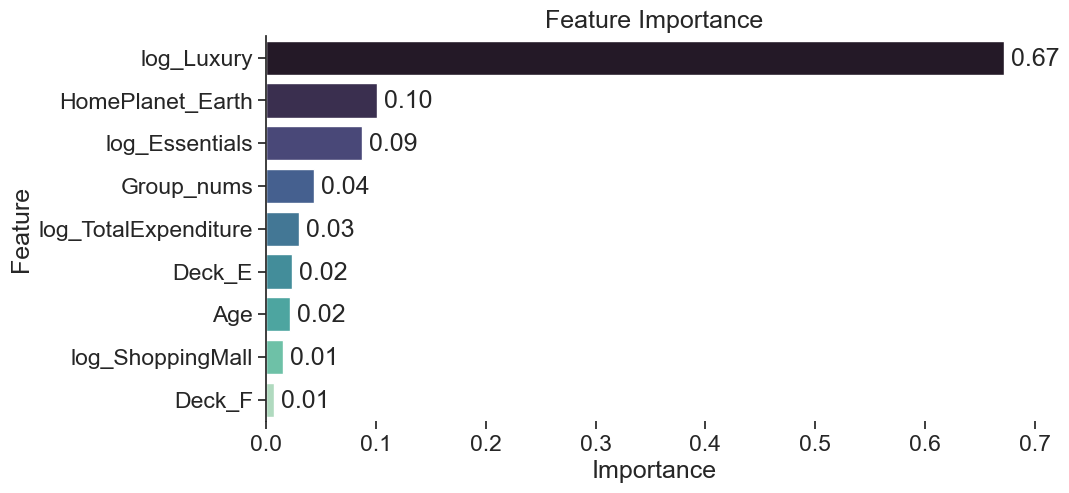

In [729]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(baseTree.feature_importances_, x_train_1.loc[:, features_dict['tree_sig']].columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

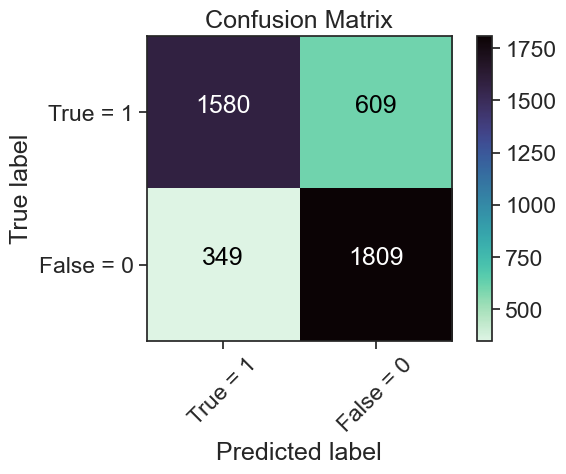

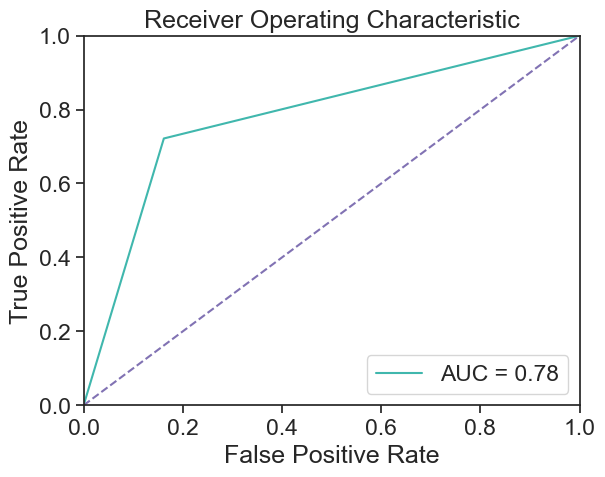

In [730]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_2, baseTree_valid_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['True = 1','False = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = baseTree.predict_proba(x_train_2.loc[:, features_dict['tree_sig']])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_2, baseTree_valid_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, '#40b7ad', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

### Tuned Random Forest

**Hyper Parameter Tuning**

In [731]:
# Tune Hyperparameters

#rf = RandomForestClassifier()

# creating a hyperparameter grid
#parameters = {
#    'n_estimators': np.arange(140, 180, 10),
#    'criterion' : ['gini', 'entropy'],
#    'max_depth': np.arange(5, 12, 1),
#    'bootstrap' : [True, True],
#    'warm_start' : [True, True]
#}


#rf_cv = RandomizedSearchCV(rf, parameters, n_iter=10, 
#                        scoring = make_scorer(roc_auc_score, needs_threshold = False), 
#                        random_state=123)

# FITTING to the FULL DATASET (due to cross-validation)
#rf_cv.fit(X,y)

# PREDICT step is not needed yet

#rf_cv.best_params_

In [732]:
# Tuned Random Forest


##############################################################################
# Create tuned model

# Instantiate model
rf_tuned = RandomForestClassifier(n_estimators=170,
                                  criterion='gini',
                                  max_depth= 5,
                                  warm_start=True,
                                  bootstrap=True) #best params from gbc


# Fit the  model
rf_tuned = rf_tuned.fit(x_train_1.loc[:, features_dict['rf_tuned']],
                        y_train_1)


# PREDICTING on the response variable
rf_tuned_train_pred = rf_tuned.predict(x_train_1.loc[:, features_dict['rf_tuned']])
rf_tuned_valid_pred = rf_tuned.predict(x_train_2.loc[:, features_dict['rf_tuned']])


#####################
# Save scores
rf_tuned_train_score = rf_tuned.score(x_train_1.loc[:, features_dict['rf_tuned']],
                                      y_train_1).round(4) # training accuracy
rf_tuned_valid_score  = rf_tuned.score(x_train_2.loc[:, features_dict['rf_tuned']], 
                                       y_train_2).round(4)   # validation accuracy

rf_tuned_train_auc_score   = roc_auc_score(y_true  = y_train_1,
                                y_score = rf_tuned_train_pred).round(decimals = 4) # training auc
rf_tuned_valid_auc_score   = roc_auc_score(y_true  = y_train_2,
                                y_score = rf_tuned_valid_pred).round(decimals = 4) # validation auc

#####################
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Tuned Random Forest

Model Size: {x_train_1.loc[:, features_dict['rf_tuned']].shape[1] + 1}

---------------------------------

Tuned Forest Training Score       : {rf_tuned_train_score}
Tuned Forest Validation Score     : {rf_tuned_valid_score}
Tuned Forest Training AUC Score   : {rf_tuned_train_auc_score}
Tuned Forest Validation AUC Score : {rf_tuned_valid_auc_score}

---------------------------------

""")



=================== MODEL SUMMARY ===================

Model Type: Tuned Random Forest

Model Size: 23

---------------------------------

Tuned Forest Training Score       : 0.8005
Tuned Forest Validation Score     : 0.7989
Tuned Forest Training AUC Score   : 0.8001
Tuned Forest Validation AUC Score : 0.7985

---------------------------------




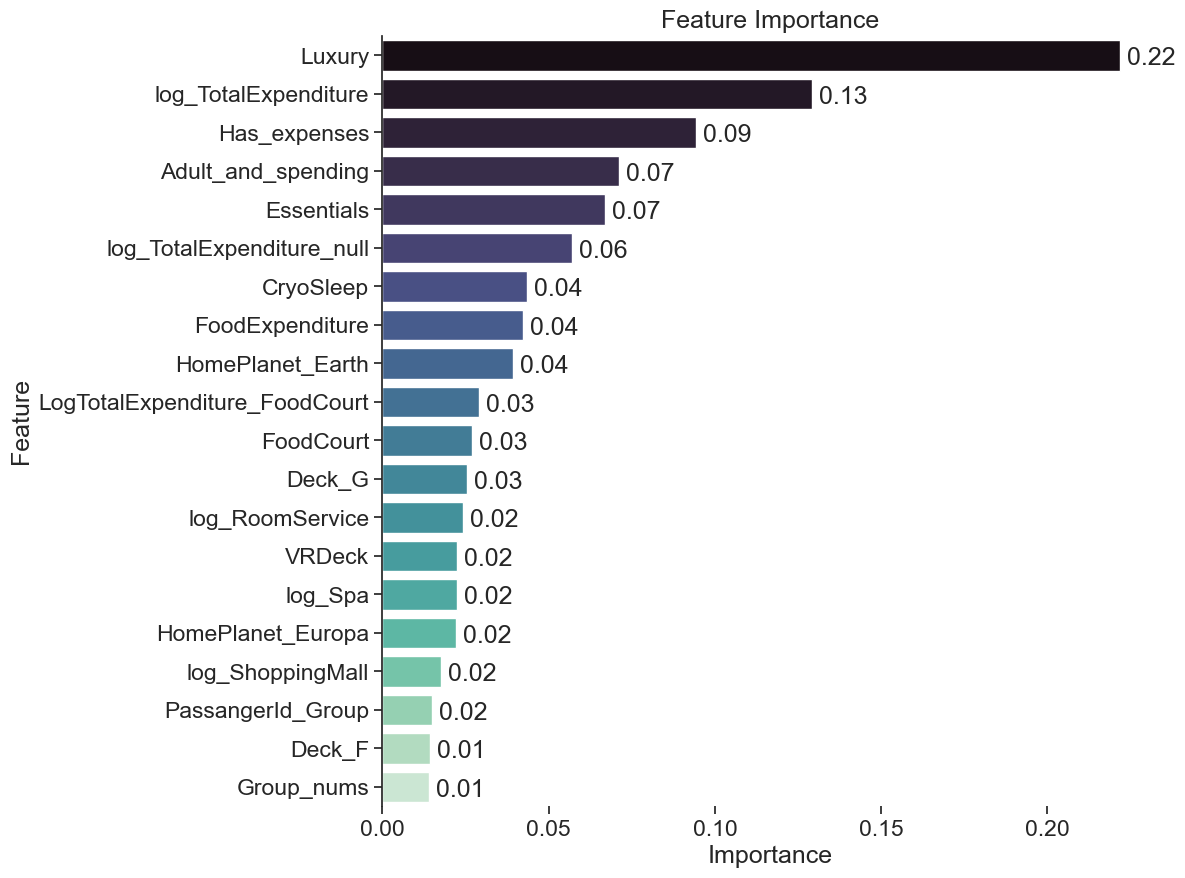

In [733]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(rf_tuned.feature_importances_, x_train_1.loc[:, features_dict['rf_tuned']].columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

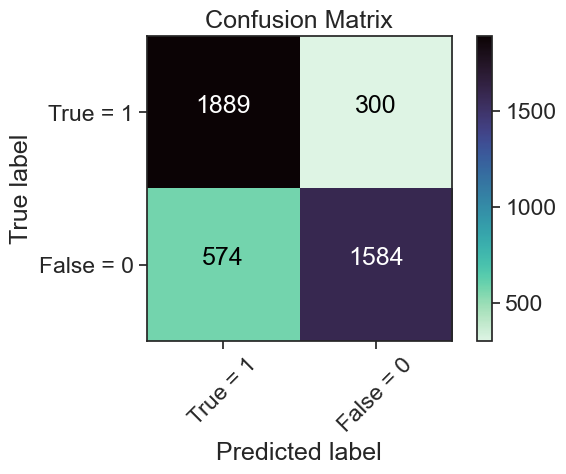

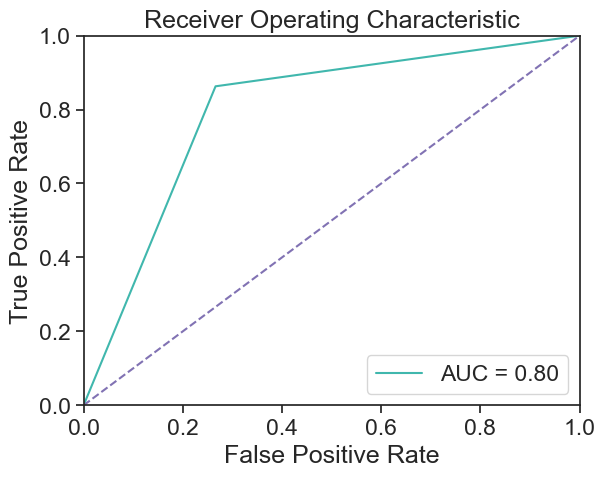

In [734]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_2, rf_tuned_valid_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['True = 1','False = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = rf_tuned.predict_proba(x_train_2.loc[:, features_dict['rf_tuned']])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_2, rf_tuned_valid_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, '#40b7ad', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

### Tuned Gradient Booster Classifier

**Hyper Parameter Tuning**

In [735]:
# Tune Hyperparameters

#gbc = GradientBoostingClassifier()

# creating a hyperparameter grid
#parameters = {
#    'n_estimators': np.arange(90, 150, 10),
#    'learning_rate': np.arange(0.1, 3.0, 0.1),
#    'max_depth': np.arange(2, 7, 1),
#    'min_samples_split': [2, 5, 10],
#   'min_samples_leaf': [1, 2, 4],
#   'max_features': ['none', 'auto', 'sqrt', 'log2']
#}

#cv = RandomizedSearchCV(gbc, 
#                        parameters, 
#                        n_iter=25, 
#                        scoring = make_scorer(roc_auc_score, needs_threshold = False), 
#                        n_jobs=-1, 
#                        cv=5, 
#                        random_state=1)

#cv.fit(X, y)
#cv.best_params_



In [736]:
# GBC Tuned


##############################################################################
# Create tuned model


# Instantiate model
gbc_tuned = GradientBoostingClassifier(n_estimators=90,
                                  min_samples_split=2,
                                  min_samples_leaf=4,
                                  max_features='sqrt', 
                                  max_depth= 2, 
                                  learning_rate=0.1) #best params from gbc


# Fit the  model
gbc_tuned = gbc_tuned.fit(x_train_1.loc[:, features_dict['gbc_tuned']], y_train_1)


# PREDICTING on the response variable
gbc_tuned_train_pred = gbc_tuned.predict(x_train_1.loc[:, features_dict['gbc_tuned']])
gbc_tuned_valid_pred = gbc_tuned.predict(x_train_2.loc[:, features_dict['gbc_tuned']])


#####################
# Save scores
gbc_tuned_train_score = gbc_tuned.score(x_train_1.loc[:, features_dict['gbc_tuned']],
                                        y_train_1).round(4) # training accuracy
gbc_tuned_valid_score  = gbc_tuned.score(x_train_2.loc[:, features_dict['gbc_tuned']],
                                         y_train_2).round(4)   # validation accuracy

gbc_tuned_train_auc_score   = roc_auc_score(y_true  = y_train_1,
                                y_score = gbc_tuned_train_pred).round(decimals = 4) # training auc
gbc_tuned_valid_auc_score   = roc_auc_score(y_true  = y_train_2,
                                y_score = gbc_tuned_valid_pred).round(decimals = 4) # validation auc




#####################
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Tuned Gradient Booster

Model Size: {x_train_1.loc[:, features_dict['gbc_tuned']].shape[1] + 1}

---------------------------------

Tuned Gradient Booster Training Score       : {gbc_tuned_train_score}
Tuned Gradient Booster Validation Score     : {gbc_tuned_valid_score}
Tuned Gradient Booster Training AUC Score   : {gbc_tuned_train_auc_score}
Tuned Gradient Booster Validation AUC Score : {gbc_tuned_valid_auc_score}

---------------------------------

""")



=================== MODEL SUMMARY ===================

Model Type: Tuned Gradient Booster

Model Size: 18

---------------------------------

Tuned Gradient Booster Training Score       : 0.8017
Tuned Gradient Booster Validation Score     : 0.7976
Tuned Gradient Booster Training AUC Score   : 0.8013
Tuned Gradient Booster Validation AUC Score : 0.7972

---------------------------------




The values above are the model results for the Tuned Gradient Boosting Classifier where it contains 4 performance metrics: training accuracy, validation accuracy, training AUC, and validation AUC. While these results are not fixed, their variation is very small, and it ranges round 0.80. These results are important because it measures the percentage of correct predictions that the model made using the training data set. With the range around 80%, it’s a relatively well performing model. Gradient Boosting is a non-parametric machine learning technique that combines models as part of its function to create a stronger model. While the goal is to be as accurate as possible, to understand which variables are pushing the model to perform better, its importance to check for feature importance for example, or even use other performance metrics like F1- score. Tuning Gradient Boosting, while is commonly used with large number of features as it gets there interactions between features, it was not the selected model for this dataset.

In [737]:
GB_titanic = titanic_df[GB_features]

print(GB_titanic.head().round(2))

    Age     Spa  VRDeck  FamilySize  Group_nums  FoodExpenditure  \
0  39.0     0.0     0.0         3.0         1.0              0.0   
1  24.0   549.0    44.0         4.0         2.0            143.0   
2  58.0  6715.0    49.0         7.0         3.0           3619.0   
3  33.0  3329.0   193.0         7.0         3.0           1654.0   
4  16.0   565.0     2.0         9.0         4.0            524.0   

   log_RoomService  log_FoodCourt  log_ShoppingMall  log_TotalExpenditure  \
0             0.00           0.00              0.00                  0.00   
1             4.70           2.30              3.26                  6.60   
2             3.78           8.18              0.00                  9.25   
3             0.00           7.16              5.92                  8.55   
4             5.72           4.26              5.02                  7.00   

   log_Essentials  log_Luxury  Age_group  ShoppingMall_TotalExpenditure  \
0            0.00        0.00        5.0             

In [738]:
#Log Feature Engineered variables

#Looking at the first few results and locking it using loc method

print(GB_titanic.loc[0:4,'log_TotalExpenditure':'log_ShoppingMall'].round(2))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


One of the models tested was gradient boosting which is commonly used for classification (Masui, 2022). However, since there were many variables that the range varied significantly, we decided to use log transformation. These varibles included the log for: total expenditure, room service, spa, VRDeck, food court, shopping mall, age group, and total expenditure. Log is used to help normalize the distribution of the variable and therefore improving the performance and accuracy of the model (Htoon, 2020). With the loc function, we can get the first few values of the log transformed variables and make a comparison between them. With these variables, we can understand the relationship between these amenities and what they say about the passengers on board. Log transformation is a useful tool for normalizing the distribution of variables and improving the performance of classification models. These variables were used for the Gradient Boosting model and for that contribute to the prediction of the transported passengers.

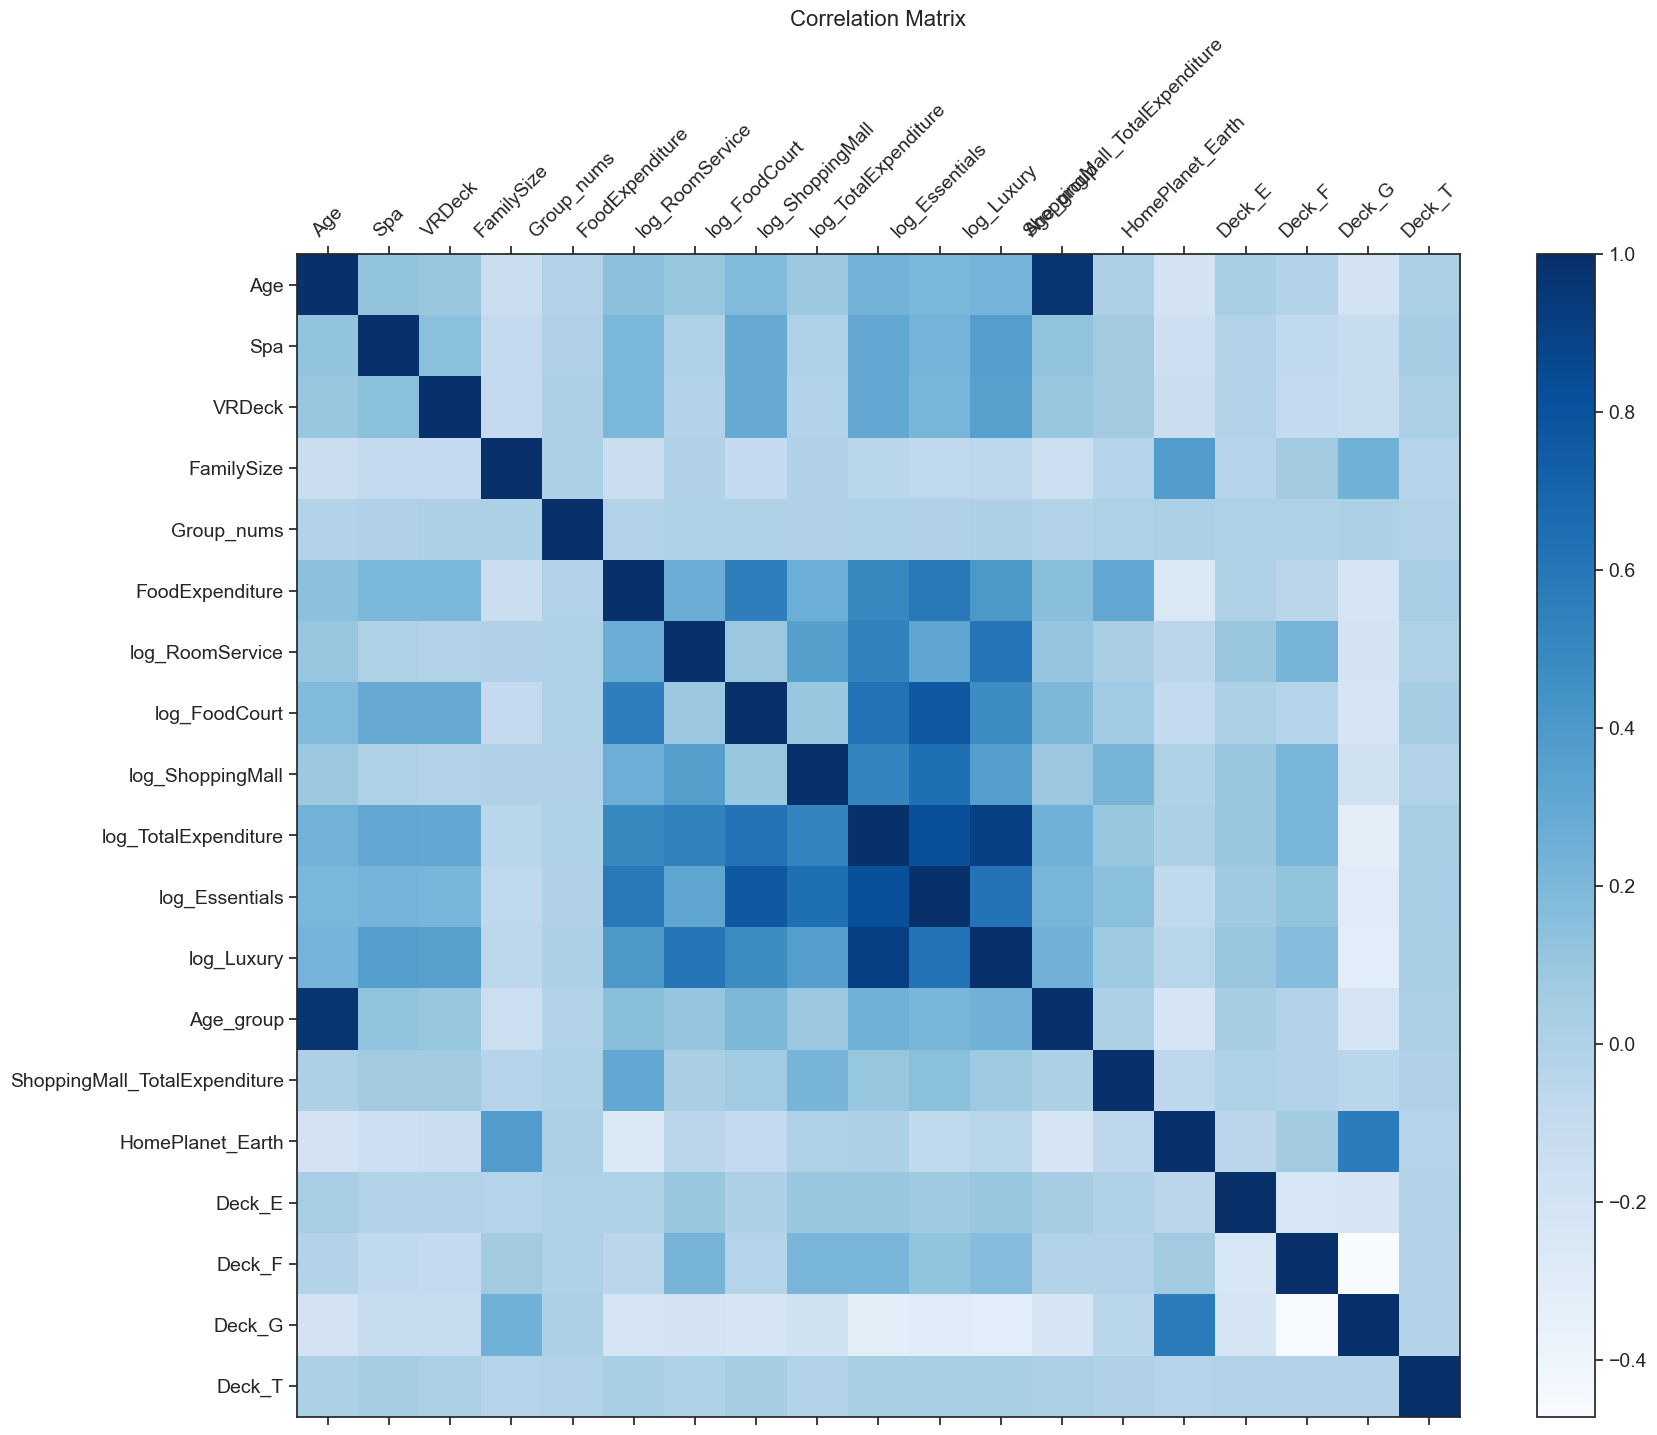

In [739]:
#Correlation between the variables selected for Gradient Boosting

#setting correlation variable
data_corr = GB_titanic.corr()

#creating the matrix
corr_matrix = plt.figure(figsize=(20, 15))
plt.matshow(data_corr, fignum=corr_matrix.number, cmap = 'Blues')
plt.xticks(range(data_corr.shape[1]),
           data_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(data_corr.shape[1]), 
           data_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
#Understanding the correlation between the variables (creating matrix)

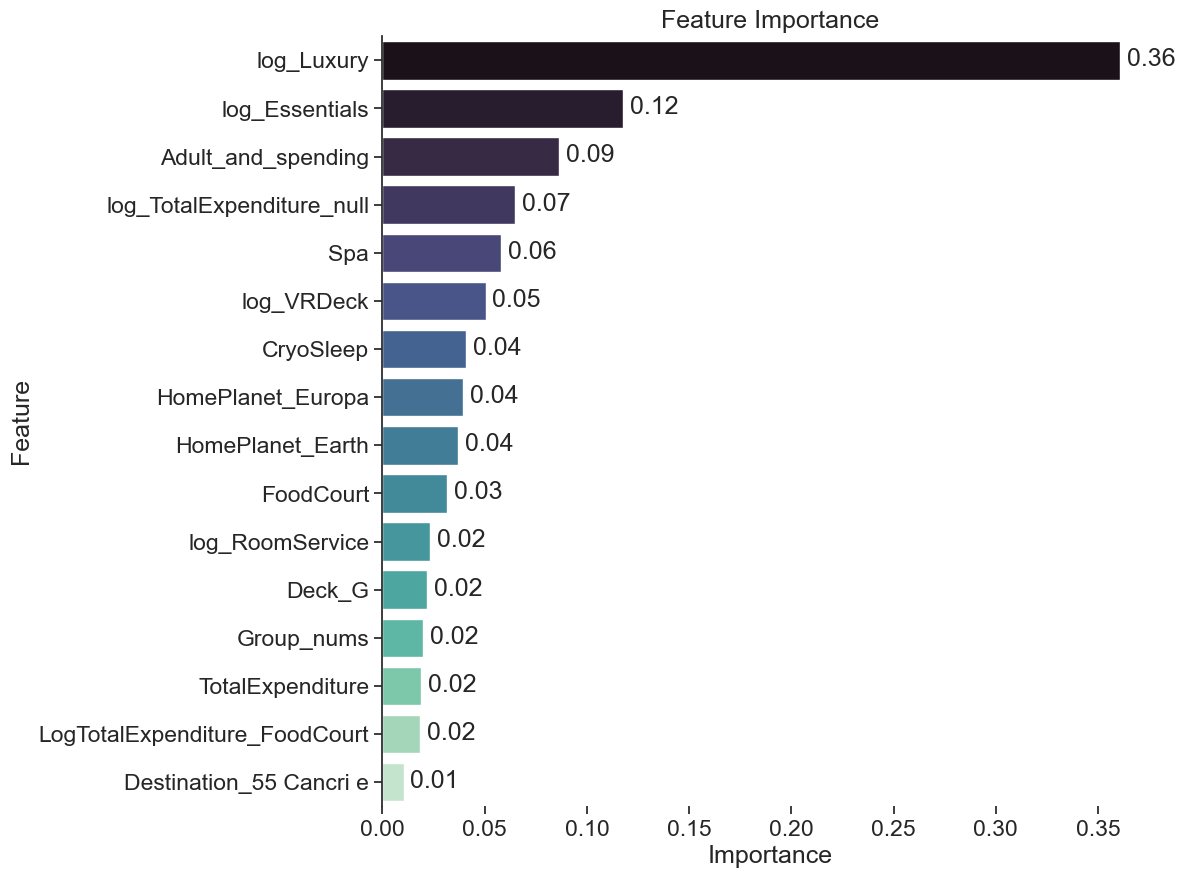

In [740]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(gbc_tuned.feature_importances_, x_train_1.loc[:, features_dict['gbc_tuned']].columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -18), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

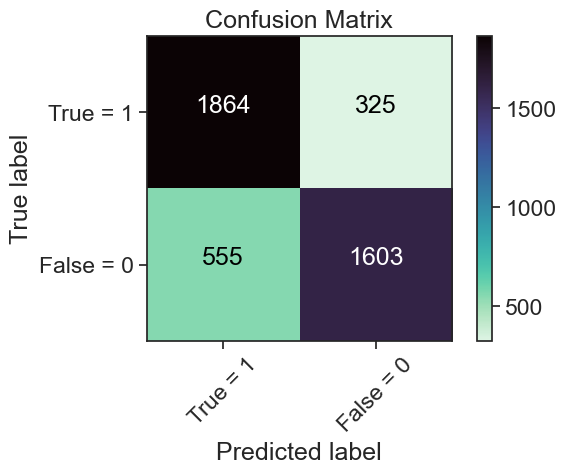

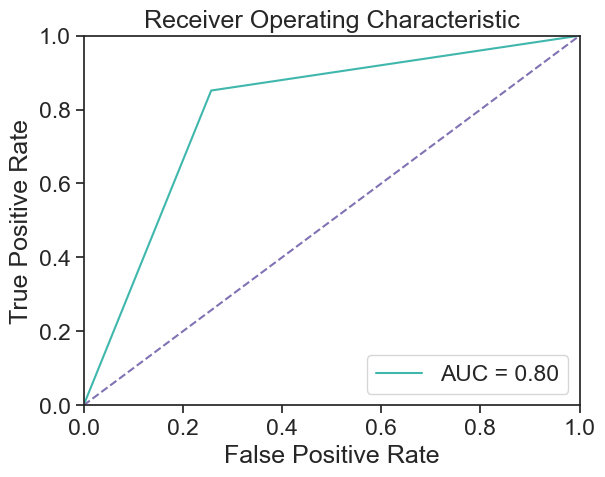

In [741]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train_2, gbc_tuned_valid_pred, labels=[1,0])
np.set_printoptions(precision = 2)

# Assess performance by plotting non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes   = ['True = 1','False = 0'],
                      normalize = False,  
                      title     = 'Confusion Matrix')
plt.show()

##############################################################################
# Plot ROC & AUC

# Calculate the FPR and TPR for all thresholds of the classification
probs = gbc_tuned.predict_proba(x_train_2.loc[:, features_dict['gbc_tuned']])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_2, gbc_tuned_valid_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, '#40b7ad', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Source of code:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

### Stacking

In [742]:
# setting x_test
x_test  = titanic_df.loc[:, features_dict['all']][titanic_df['set'] == 'Testing']


# Make predictions on the Part 2 data
x_train_2['gb_pred'] = gbc_tuned.predict(x_train_2.loc[:, features_dict['gbc_tuned']])
x_train_2['rf_pred'] = rf_tuned.predict(x_train_2.loc[:, features_dict['rf_tuned']])
x_train_2['dt_pred'] = baseTree.predict(x_train_2.loc[:, features_dict['tree_sig']])

# Make predictions on the test data
x_test['gb_pred'] = gbc_tuned.predict(x_test.loc[:, features_dict['gbc_tuned']])
x_test['rf_pred'] = rf_tuned.predict(x_test.loc[:, features_dict['rf_tuned']])
x_test['dt_pred'] = baseTree.predict(x_test.loc[:, features_dict['tree_sig']])

In [743]:
# Create logistic regression model without the intercept
lg = LogisticRegression(fit_intercept=False)

# Train 2nd level model on the Part 2 data
lg.fit(x_train_2[['gb_pred', 'rf_pred', 'dt_pred']], y_train_2)

# Make stacking predictions on the test data
x_test['Transported'] = lg.predict(x_test[['gb_pred', 'rf_pred', 'dt_pred']])

# Look at the model coefficients
print(lg.coef_)

[[0.17 0.3  1.07]]


In [744]:
# saving predictions with their respective Ids from the test set
predictions_stacking = pd.DataFrame()
predictions_stacking['PassengerId'] = titanic_test['PassengerId']
predictions_stacking['Transported'] = x_test['Transported'].astype('bool')
predictions_stacking = predictions_stacking.reset_index()
predictions_stacking = predictions_stacking.drop('index', axis=1)



# checking the results
predictions_stacking.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


# Bibliography

Harrison, G. (2022, February 28). A Deep Dive into Stacking Ensemble Machine Learning — Part I. Medium. https://towardsdatascience.com/a-deep-dive-into-stacking-ensemble-machine-learning-part-i-10476b2ade3

Htoon, K. S. (2020, February 29). Log Transformation: Purpose and Interpretation. Medium. https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-
    interpretation-9444b4b049c9

Masui, T. (2022, February 12). All You Need to Know about Gradient Boosting Algorithm − Part 1. Regression. Medium. https://towardsdatascience.com/all-you-
    need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502
